# Create boundary conditions for Pb

June, 2019

In [95]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import datetime
import matplotlib
from mpl_toolkits.basemap import Basemap
import cmocean
import csv
import pandas as pd
import pickle
from matplotlib.patches import Polygon 
from scipy.signal import savgol_filter
import scipy as sc
from matplotlib.patches import ConnectionPatch
import gsw

%matplotlib notebook

In [44]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


Load extended domain

In [3]:
mesh = nc.Dataset('/ocean/brogalla/GEOTRACES/analysis-birgit/notebooks/ANHA12/ANHA12_mesh1.nc')
mesh_lon = np.array(mesh.variables['nav_lon'])
mesh_lat = np.array(mesh.variables['nav_lat'])
mesh_bathy = np.array(mesh.variables['tmask'][0,:,:,:])
cond = (mesh_bathy > 0.1)
bathy_masked = np.ma.masked_where(cond, mesh_bathy)
ocean_masked = np.ma.masked_where((mesh_bathy<0.1), mesh_bathy)

Load ANHA12 fields

In [4]:
m      = nc.Dataset('/data/brogalla/run_storage/trial3/spin-up3/'+\
               'ANHA12_EXH006_2002_monthly.nc', 'r')
mdepth = np.array(m.variables['deptht'])
mlons  = np.array(m.variables['nav_lon'])
mlats  = np.array(m.variables['nav_lat'])

Load Pb data

In [5]:
folder= '/ocean/brogalla/GEOTRACES/data/'

GEOTRACES cruise:

In [6]:
t      = nc.Dataset('/data/brogalla/ANHA12/ANHA12-EXH006_y2015m08d13_gridT.nc', 'r')
saline = np.array(t.variables['vosaline'])
temper = np.array(t.variables['votemper'])

In [7]:
rho = gsw.sigma0(saline,temper)

In [8]:
CAA = pd.read_csv(folder+'Pb-paper-data.csv')
CAA_lons     = CAA['station lon'].dropna().astype('float').values[1:]
CAA_lats     = CAA['Station lat'].dropna().astype('float').values[1:]
CAA_names    = CAA['Station names'].dropna().astype('str')
CAA_Pb_short = [CAA['CB3'].dropna().astype('float').values, \
                CAA['CB4'].dropna().astype('float').values, \
                CAA['LS2'].dropna().astype('float').values, \
                CAA['BB1'].dropna().astype('float').values]

dPb_BB1 = CAA['BB1'][np.isfinite(CAA['BB1'])].astype('float')
dPb_BB2 = CAA['BB2'][np.isfinite(CAA['BB2'])].astype('float')
dPb_BB3 = CAA['BB3'][np.isfinite(CAA['BB3'])].astype('float')
dPb_CB1 = CAA['CB1'][np.isfinite(CAA['CB1'])].astype('float')
dPb_CB2 = CAA['CB2'][np.isfinite(CAA['CB2'])].astype('float')
dPb_CB3 = CAA['CB3'][np.isfinite(CAA['CB3'])].astype('float')
dPb_CB4 = CAA['CB4'][np.isfinite(CAA['CB4'])].astype('float')
dPb_CAA1 = CAA['CAA1'][np.isfinite(CAA['CAA1'])].astype('float')
dPb_CAA2 = CAA['CAA2'][np.isfinite(CAA['CAA2'])].astype('float')
dPb_CAA3 = CAA['CAA3'][np.isfinite(CAA['CAA3'])].astype('float')
dPb_CAA4 = CAA['CAA4'][np.isfinite(CAA['CAA4'])].astype('float')
dPb_CAA5 = CAA['CAA5'][np.isfinite(CAA['CAA5'])].astype('float')
dPb_CAA6 = CAA['CAA6'][np.isfinite(CAA['CAA6'])].astype('float')
dPb_CAA7 = CAA['CAA7'][np.isfinite(CAA['CAA7'])].astype('float')
dPb_CAA8 = CAA['CAA8'][np.isfinite(CAA['CAA8'])].astype('float')
dPb_CAA9 = CAA['CAA9'][np.isfinite(CAA['CAA9'])].astype('float')

depth_BB1 = CAA['Depth.1'][np.isfinite(CAA['BB1'])].astype('float')
depth_BB2 = CAA['Depth.2'][np.isfinite(CAA['BB2'])].astype('float')
depth_BB3 = CAA['Depth.3'][np.isfinite(CAA['BB3'])].astype('float')
depth_CB1 = CAA['Depth.13'][np.isfinite(CAA['CB1'])].astype('float')
depth_CB2 = CAA['Depth.14'][np.isfinite(CAA['CB2'])].astype('float')
depth_CB3 = CAA['Depth.15'][np.isfinite(CAA['CB3'])].astype('float')
depth_CB4 = CAA['Depth.16'][np.isfinite(CAA['CB4'])].astype('float')
depth_CAA1 = CAA['Depth.4'][np.isfinite(CAA['CAA1'])].astype('float')
depth_CAA2 = CAA['Depth.5'][np.isfinite(CAA['CAA2'])].astype('float')
depth_CAA3 = CAA['Depth.6'][np.isfinite(CAA['CAA3'])].astype('float')
depth_CAA4 = CAA['Depth.7'][np.isfinite(CAA['CAA4'])].astype('float')
depth_CAA5 = CAA['Depth.8'][np.isfinite(CAA['CAA5'])].astype('float')
depth_CAA6 = CAA['Depth.9'][np.isfinite(CAA['CAA6'])].astype('float')
depth_CAA7 = CAA['Depth.10'][np.isfinite(CAA['CAA7'])].astype('float')
depth_CAA8 = CAA['Depth.11'][np.isfinite(CAA['CAA8'])].astype('float')
depth_CAA9 = CAA['Depth.12'][np.isfinite(CAA['CAA9'])].astype('float')

GEOTRACES cruise North Atlantic:

In [9]:
Pb_NA = nc.Dataset(folder+'GEOTRACES_IDP2017_v2_Discrete_Sample_Data_5024209a_1.nc')

In [10]:
NA_lats   = np.array(Pb_NA.variables['latitude'])
NA_lons   = np.array(Pb_NA.variables['longitude'])
NA_depths = np.array(Pb_NA.variables['var2'])
NA_time   = np.array(Pb_NA.variables['date_time'])
Pb_NA     = np.array(Pb_NA.variables['var5']) # in pmol/kg

In [11]:
condNA = np.logical_or( Pb_NA > 1e5, Pb_NA < -1e5)
masked_Pb_NA = np.ma.masked_where(condNA, Pb_NA)
masked_depths_NA = np.ma.masked_where(condNA, NA_depths)

Pb from Arctic Ocean:

In [12]:
df = pd.read_csv(folder+'Pb_rob_rember.csv', parse_dates=['DATE']).dropna()

In [13]:
AO_depths = np.array(df['CTDDEPTH'])
AO_lats   = np.array(df['LATITUDE'])
AO_lons   = np.array(df['LONGITUDE'])
AO_dPb    = np.array(df['Pb_(pMol)'])

Map of all cruise Pb station locations:

<IPython.core.display.Javascript object>


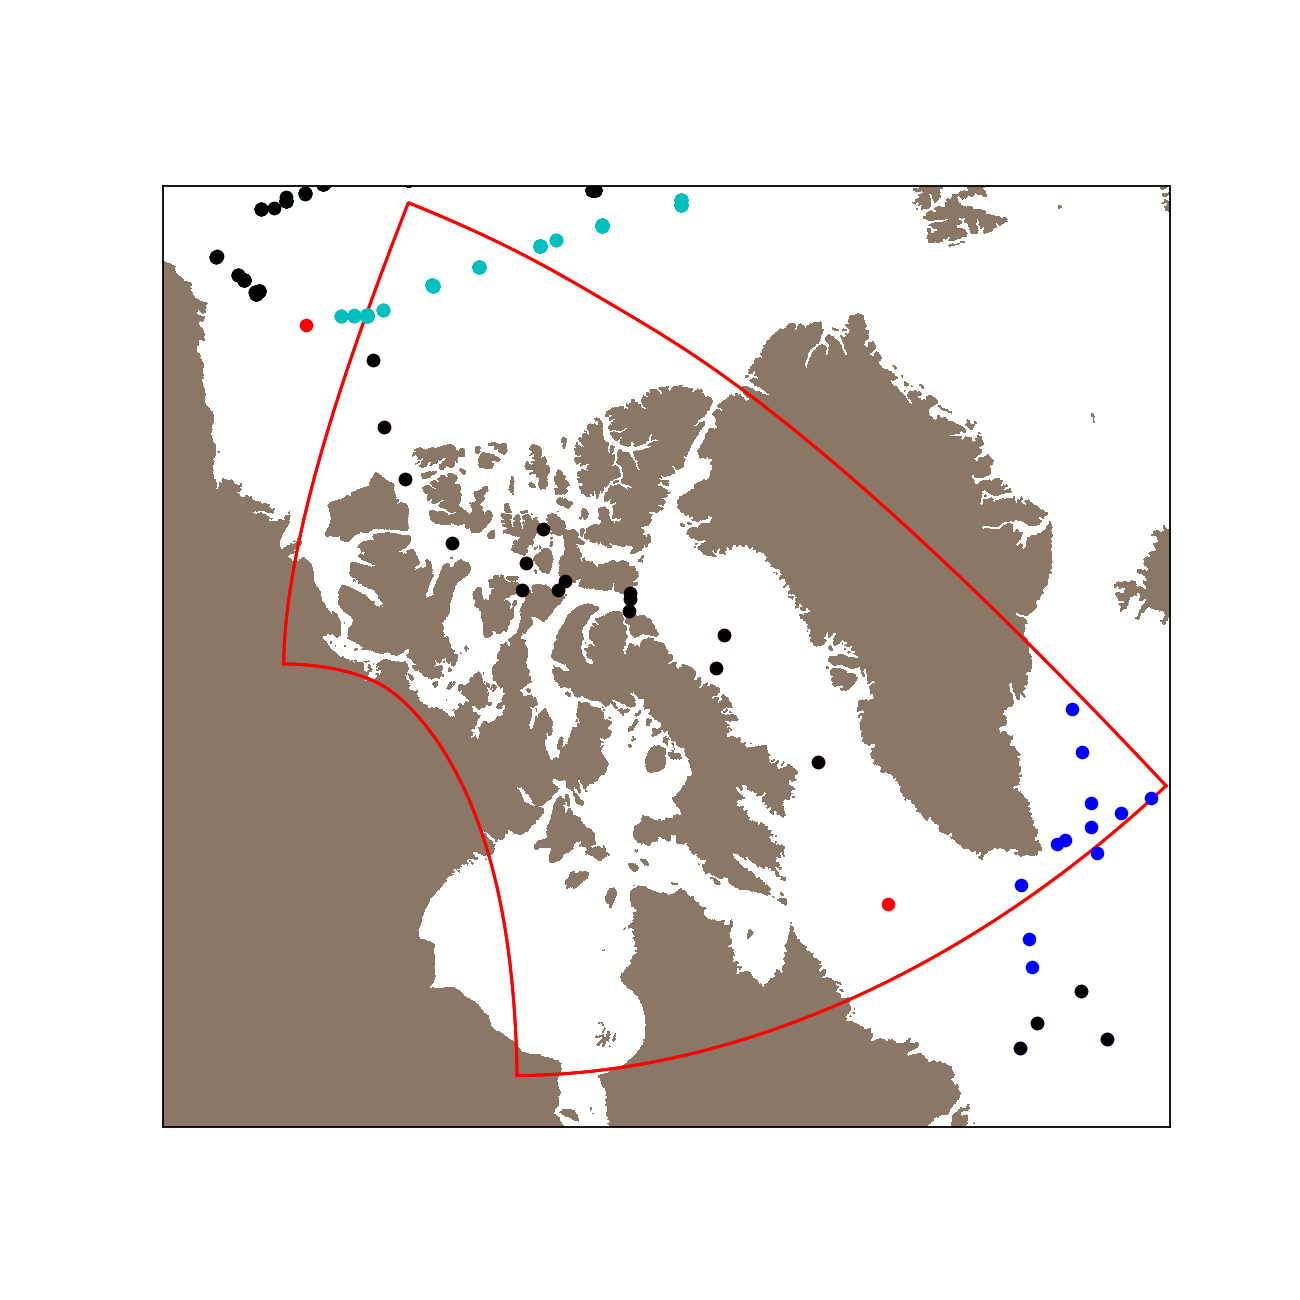

In [12]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Pb.pickle','rb'))
x, y = proj(mesh_lon, mesh_lat)

# sub-domain:
l1=1100
proj.plot(x[l1:2050,799]   , y[l1:2050,799]   , 'r-', lw=1.3);
proj.plot(x[l1:2050,799].T , y[l1:2050,799].T , 'r-', lw=1.3);
proj.plot(x[l1:2050,180]   , y[l1:2050,180]   , 'r-', lw=1.3);
proj.plot(x[l1:2050,180].T , y[l1:2050,180].T , 'r-', lw=1.3);
proj.plot(x[l1,180:799]    , y[l1,180:799]    , 'r-', lw=1.3);
proj.plot(x[l1,180:799].T  , y[l1,180:799].T  , 'r-', lw=1.3);
proj.plot(x[2050,180:799]    , y[2050,180:799]    , 'r-', lw=1.3);
proj.plot(x[2050,180:799].T  , y[2050,180:799].T  , 'r-', lw=1.3);

# Canadian GEOTRACES station locations:
x_CAA, y_CAA = proj(CAA_lons, CAA_lats)
proj.plot(x_CAA, y_CAA, '.r', markersize=10)
proj.plot(x_CAA[1:16], y_CAA[1:16], '.k', markersize=10)

# North Atlantic GEOTRACES station locations:
x_NA, y_NA = proj(NA_lons-360, NA_lats)
proj.plot(x_NA, y_NA, '.b', markersize=10)
proj.plot(x_NA[NA_lats < 55], y_NA[NA_lats < 55], '.k', markersize=10)

# Arctic Ocean station locations:
x_AO, y_AO = proj(AO_lons, AO_lats)
proj.plot(x_AO, y_AO, '.c', markersize=10)
proj.plot(x_AO[0:144], y_AO[0:144], '.k', markersize=10)
proj.plot(x_AO[290:334], y_AO[290:334], '.k', markersize=10)

# Canada Basin boundary

In [14]:
bathy_CB = mesh_bathy[:,2050,310:799]
bathy_CB_masked = np.ma.masked_where((bathy_CB > 0.1), bathy_CB)

# create a mesh to plot in
ANHA12lat_CB = mesh_lat[2050,310:799]
yy_CB, zz_CB = np.meshgrid(ANHA12lat_CB, mdepth) #latitude, depth

In [15]:
Pb_CB = np.empty_like(bathy_CB)

# Pb_CB.fill(3) # Average background concentration

Pb_CB[zz_CB < 20] = 5 # Low surface concentrations
Pb_CB[(zz_CB > 20) & (zz_CB < 50)]   = 4
Pb_CB[(zz_CB < 50) & (yy_CB < 72.3)] = 3 

Pb_CB[(zz_CB > 50) & (zz_CB < 100) & (yy_CB < 74)] = 12 # Highest concentrations
Pb_CB[(zz_CB > 50) & (zz_CB < 100) & (yy_CB > 74)] = 8  

Pb_CB[(zz_CB > 100) & (zz_CB < 400)] = 6
# Pb_CB[(zz_CB > 80) & (zz_CB < 250) & (yy_CB > 74)] = 3

Pb_CB[(zz_CB > 400) & (zz_CB < 800)] = 5 # atlantic layer Fram Strait Branch
Pb_CB[(zz_CB > 300) & (zz_CB < 700) & (yy_CB > 75)] = 5
Pb_CB[(zz_CB > 250) & (zz_CB < 700) & (yy_CB > 77)] = 4
Pb_CB[(zz_CB > 700) & (zz_CB < 800) & (yy_CB > 75)] = 3 

Pb_CB[(zz_CB > 800) & (zz_CB < 2000)] = 4 # atlantic layer Fram Strait Branch

# Low bottom concentrations:
Pb_CB[zz_CB > 2000] = 3

The concentrations progressively increased, reaching the highest values measured in the Canada Basin (8.3–15.9 pmol kg–1), with a marked shoaling of the peak from CB4 to CB1 (∼100 to 40 m) due to the deepening of isopycnal surfaces in the central Beaufort Gyre. Interestingly, when dissolved concentrations are plotted against density, the peak is aligned in a narrow layer at σθ between 24.8 and 25.8 isopycnal surfaces, and its top (σθ, 24.8) coincides with the temperature maximum of the ACW (upper halocline layer) transitioning to the wBSW (middle halocline layer) by its bottom (σθ, 25.8). 

In the upper halocline (ACW) with salinity profiles displaying large regional variability in the top 300 m (29 < S ≤ 32.2; the Pb concentrations in/or just below the ACW water from CB2 to CB4 had similar values (10.0 ± 1.2 pmol kg–1). Slightly higher Pb concentrations (15.9 pmol kg–1) were measured in a warm surface halocline in the range 27 < S < 31.5, probably developed by solar heating of ice-free surface waters.

The ACW occupies most of the Beaufort Sea and the North American continental slope, and regardless of the water type, high Pb was observed at the four stations. This high-Pb signature can be traced from the northeast Subarctic Pacific (GEOTRACES cruise GP02), where concentrations in the upper 200 m range from approximately 40 to 50 pmol kg–1, as a result of the increased industrial emissions from Asian countries and Russia over the past 4 decades. During its transit through the Bering and Chukchi Seas, this high-Pb signal is weakened, with concentration ranging from 13 to 20 pmol kg–1 on the Bering Sea slope and from 3 to 13 pmol kg–1 in Bering Strait, values that are in the same range as those observed in the ACW across the Canada Basin. The decrease of this high signature from the Northeast Subarctic Pacific to the Canada Basin is attributed primarily to the efficient scavenging of Pb, a highly particle reactive element, in the shallow and productive Bering and Chukchi shelves,(37,73) yielding short residence times in this region (<1 year)

Beneath the upper halocline Pb peak, low concentrations were found across the wBSW and Atlantic-derived lower halocline layer (∼100–300 m), with lower concentrations at stations CB2–CB4 (type II waters) than at CB1, type III water (2.2 ± 0.7 vs 6.0 ± 0.1 pmol kg–1). Although ACW and wBSW are both of Pacific origin, they exhibit distinctive physicochemical properties, aside from those observed for Pb. Compared with ACW, wBSW is distinguished by a weak temperature minimum near S = 33.1, high nutrient concentrations, nutrient-like trace metals, high dissolved organic matter, and low oxygen concentrations.
These distinctive properties provide evidence that wBSW undergoes notable organic matter remineralization in the Bering and Chukchi shelves. In summer the surface waters are freshened by sea ice melt, isolating wBSW to a deeper layer in close proximity with the sediment. Dissolved Pb distributions, unlike nutrient-like trace metals, are low in the cold, near-bottom wBSW, revealing a potential enhanced removal of Pb at the sediment–water boundary by sediment resuspension events over the extensive continental shelves. 

A slight increase in Pb (4.6 ± 0.8 pmol kg–1) is observed in the warm Atlantic layer (∼300 to 800 m; σθ= 27.9), reflecting the circulation of the Fram Strait Branch (FSB) in the boundary current along the continental slope. Underlying the Atlantic layer, low concentrations (3.2 ± 0.3 pmol kg–1) were measured in Canada Basin deep waters (1500–3500 m).

In [16]:
smoothed_Pb_CB1 = np.empty_like(Pb_CB)
smoothed_Pb_CB = np.empty_like(Pb_CB)

# Smooth vertically (along depth)
for i in range(0, len(Pb_CB[0,:])):
    smoothed_Pb_CB1[:,i] = savgol_filter(Pb_CB[:,i], 15, 3)

# Smooth horizontally along cross section
for depth in range(0, len(Pb_CB[:,0])):
    smoothed_Pb_CB[depth,:] = savgol_filter(smoothed_Pb_CB1[depth,:], 31, 3)

In [94]:
print(np.average(AO_dPb))

3.7394011976047907


<IPython.core.display.Javascript object>


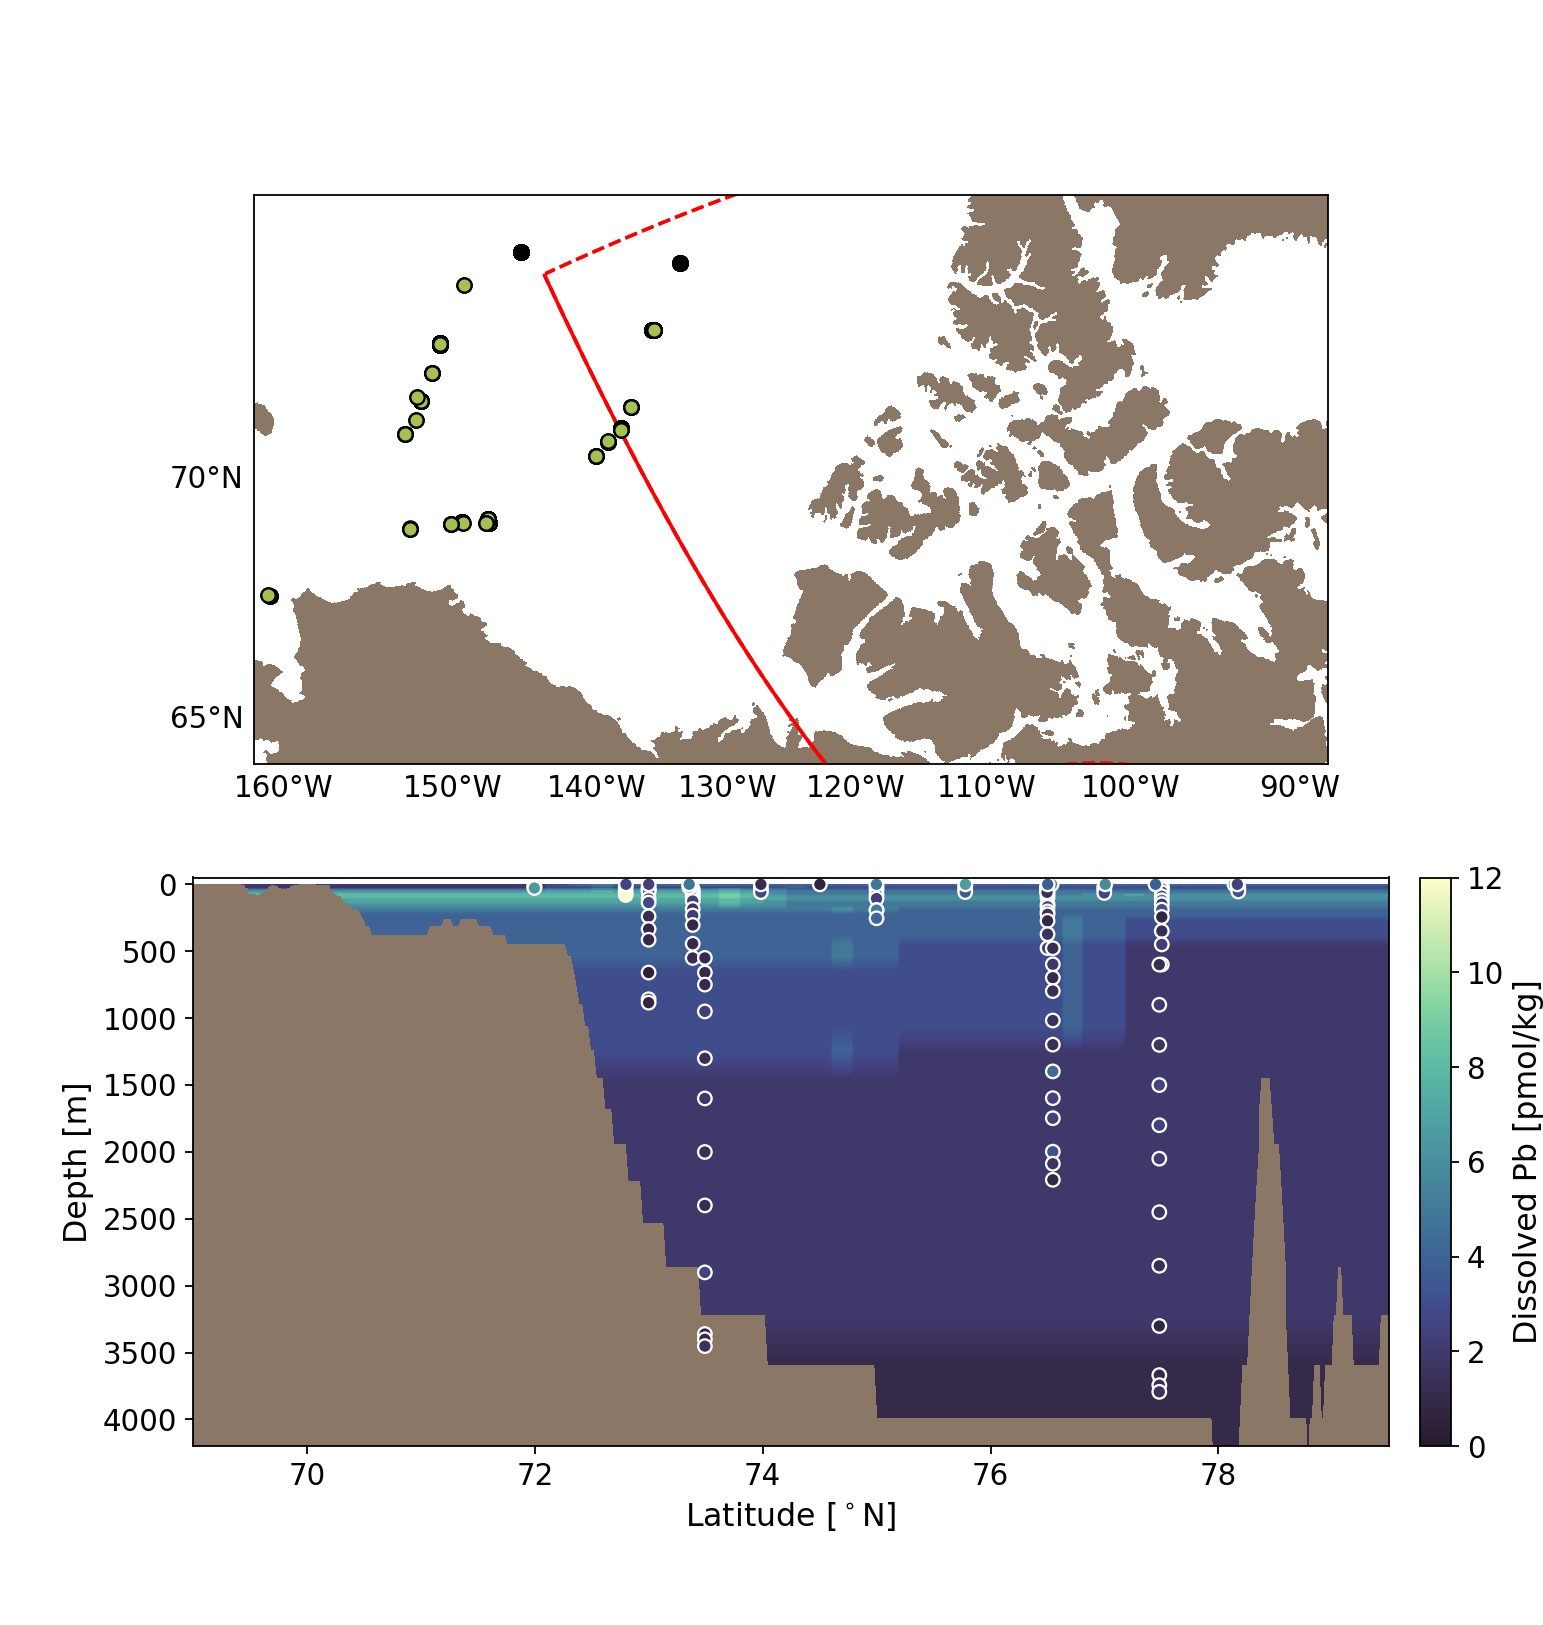

In [48]:
fig, ax = plt.subplots(2,1,figsize=(9.5,10))

#-------------------------------------------------------------------------------------
proj1=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -125, resolution='i', width=3.4e6, height=1.8e6, ax=ax[0])
proj1.drawparallels(np.arange(int(50),int(90),5),labels=[1,0,0,0], linewidth=0.0, fontsize=13)
proj1.drawmeridians(np.arange(int(-160),int(0),10),labels=[0,0,0,1], linewidth=0.0, fontsize=13)

# Domain boundaries:
x, y = proj1(mesh_lon, mesh_lat)
proj1.contourf(x, y, bathy_masked[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=1)

l1=1100
proj1.plot(x[l1:2050,799]   , y[l1:2050,799]   , 'r--', lw=1.5);
proj1.plot(x[l1:2050,799].T , y[l1:2050,799].T , 'r--', lw=1.5);
proj1.plot(x[l1:2050,180]   , y[l1:2050,180]   , 'r--', lw=1.5);
proj1.plot(x[l1:2050,180].T , y[l1:2050,180].T , 'r--', lw=1.5);
proj1.plot(x[l1,180:799]    , y[l1,180:799]    , 'r--', lw=1.5);
proj1.plot(x[l1,180:799].T  , y[l1,180:799].T  , 'r--', lw=1.5);
proj1.plot(x[2050,180:799]    , y[2050,180:799]    , 'r--', lw=1.5);
proj1.plot(x[2050,180:799].T  , y[2050,180:799].T  , 'r--', lw=1.5);
proj1.plot(x[2050,310:799]      , y[2050,310:799]  , 'r-', lw=1.6)

# Arctic Ocean station locations:
x_AO, y_AO = proj1(AO_lons, AO_lats)
proj1.scatter(x_AO, y_AO, c='k', s=40, zorder=5)
proj1.scatter(x_AO[230:-1], y_AO[230:-1], c='#a5c151', s=40, zorder=5, edgecolor='k')
proj1.scatter(x_AO[0:75], y_AO[0:75], c='#a5c151', s=40, zorder=5, edgecolor='k')

#-------------------------------------------------------------------------------------
ax[1].invert_yaxis()
ax[1].contourf(yy_CB, zz_CB, smoothed_Pb_CB, 100, vmin=0, vmax=12, cmap=cmocean.cm.deep_r)
ax[1].contourf(yy_CB, zz_CB, bathy_CB_masked, cmap=matplotlib.colors.ListedColormap(["#8b7765"]))
CS = ax[1].scatter(AO_lats[0:75], AO_depths[0:75], c=AO_dPb[0:75], vmin=0, vmax=12, \
                edgecolor='w', cmap=cmocean.cm.deep_r)
CS = ax[1].scatter(AO_lats[230:-1], AO_depths[230:-1], c=AO_dPb[230:-1], vmin=0, vmax=12, \
                edgecolor='w', cmap=cmocean.cm.deep_r)
ax[1].set_xlabel('Latitude [$^\circ$N]', fontsize=14)
ax[1].set_ylabel('Depth [m]', fontsize=14)
ax[1].set_ylim([4200,-50])
ax[1].set_xlim([69, 79.5])
ax[1].tick_params(axis='both', which='major', labelsize=13)

cbaxes = fig.add_axes([0.92, 0.11, 0.02, 0.35]) 
CBar = plt.colorbar(CS, ax=ax[1], cax=cbaxes)
CBar.ax.tick_params(labelsize=13) 
CBar.set_label('Dissolved Pb [pmol/kg]', fontsize=14)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/Pb_CB_BC.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


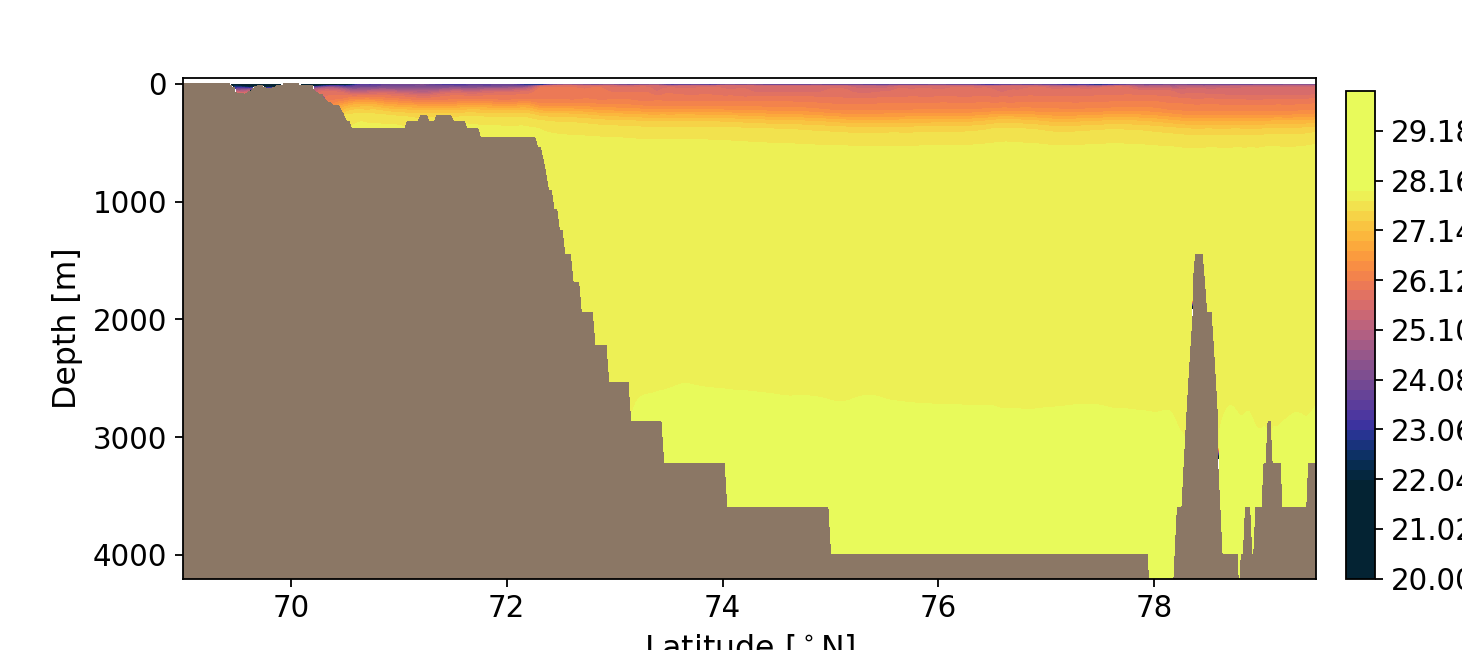

In [21]:
fig, ax = plt.subplots(1,1,figsize=(9,4))
ax.invert_yaxis()
# clevels=[0,22,23,24,25,25.5,26,26.5,27,27.5,28,28.5,30]
clevels=np.linspace(20,30,50)
CS = ax.contourf(yy_CB[0:-2], zz_CB[1:-1], rho[0,0:-2,2050,310:799],levels=clevels, vmin=22, vmax=28, cmap=cmocean.cm.thermal)
ax.contourf(yy_CB, zz_CB, bathy_CB_masked, cmap=matplotlib.colors.ListedColormap(["#8b7765"]))

ax.set_xlabel('Latitude [$^\circ$N]', fontsize=14)
ax.set_ylabel('Depth [m]', fontsize=14)
ax.set_ylim([4200,-50])
ax.set_xlim([69, 79.5])
ax.tick_params(axis='both', which='major', labelsize=13)

cbaxes = fig.add_axes([0.92, 0.11, 0.02, 0.75]) 
CBar = plt.colorbar(CS, ax=ax, cax=cbaxes)
CBar.ax.tick_params(labelsize=13) 
CBar.set_label('Density [kg/m3]', fontsize=14)

# Arctic Ocean boundary

In [17]:
bathy_AO = mesh_bathy[:,1600:2050,799]
bathy_AO_masked = np.ma.masked_where((bathy_AO > 0.1), bathy_AO)

# create a mesh to plot in
ANHA12lon_AO = mesh_lon[1600:2050,799]
ANHA12lat_AO = mesh_lat[1600:2050,799]
xx_AO, zz_AO = np.meshgrid(ANHA12lon_AO, mdepth) #latitude, depth
yy_AO, zz_AO = np.meshgrid(ANHA12lat_AO, mdepth) #latitude, depth
nn_AO, zz_AO = np.meshgrid(range(0,450), mdepth)

In [18]:
Pb_AO = np.empty_like(bathy_AO)

Pb_AO.fill(3) # Average background concentration

Pb_AO[zz_AO < 50] = 5 # Low surface concentrations
Pb_AO[(zz_AO > 50) & (zz_AO < 100)]  = 8 # Highest concentrations
Pb_AO[(zz_AO > 100) & (zz_AO < 400)] = 6 
Pb_AO[(zz_AO > 400) & (zz_AO < 800)] = 3 # atlantic layer Fram Strait Branch

Pb_AO[(zz_AO > 800) & (zz_AO < 2000)] = 4

# Low bottom concentrations:
Pb_AO[zz_AO > 2000] = 3

In [19]:
smoothed_Pb_AO1 = np.empty_like(Pb_AO)
smoothed_Pb_AO = np.empty_like(Pb_AO)

# Smooth vertically (along depth)
for i in range(0, len(Pb_AO[0,:])):
    smoothed_Pb_AO1[:,i] = savgol_filter(Pb_AO[:,i], 15, 3)

# Smooth horizontally along cross section
for depth in range(0, len(Pb_AO[:,0])):
    smoothed_Pb_AO[depth,:] = savgol_filter(smoothed_Pb_AO1[depth,:], 31, 3)

<IPython.core.display.Javascript object>


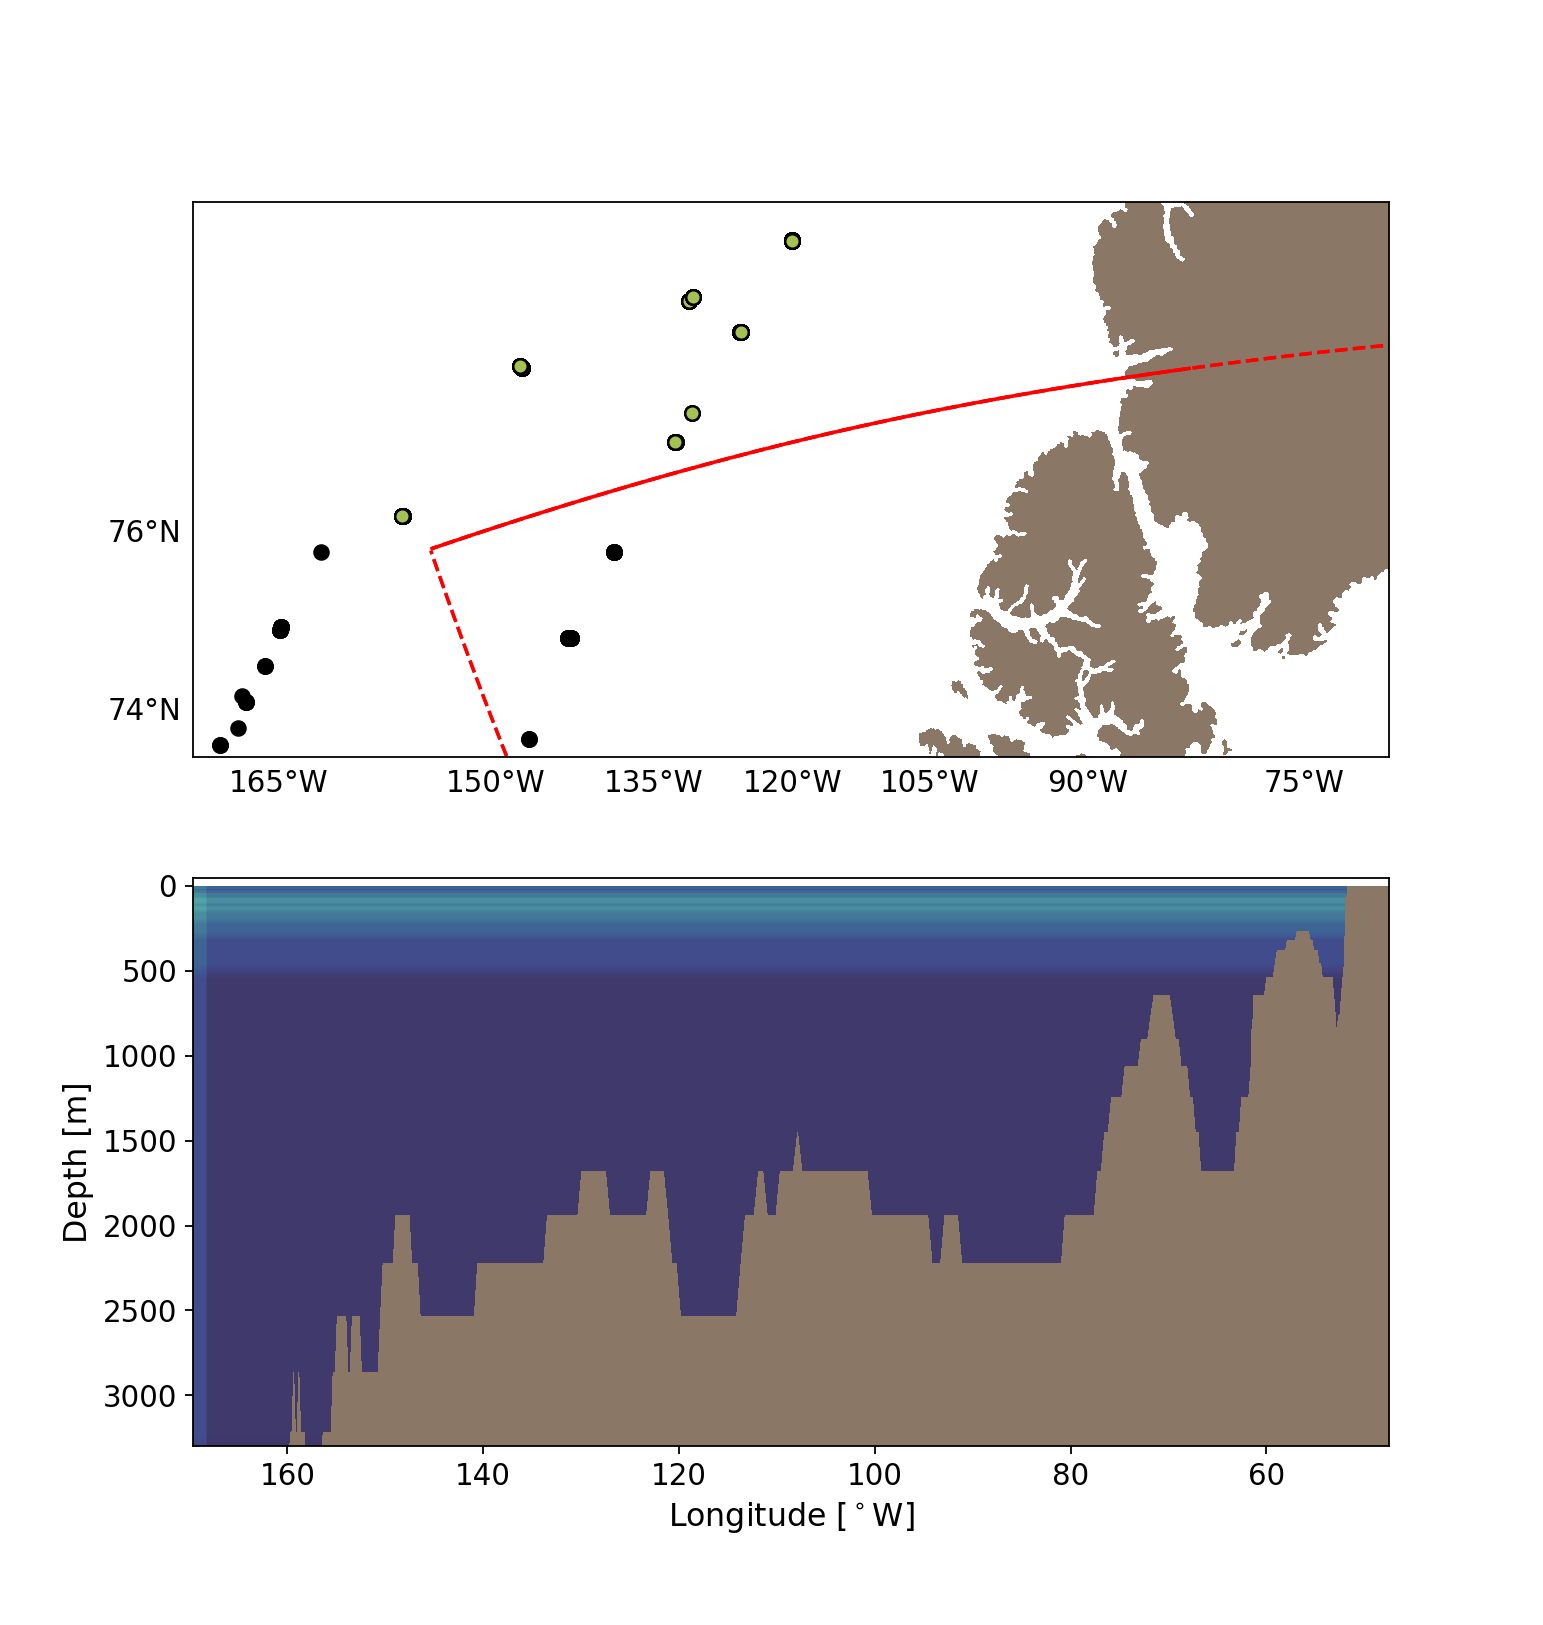

In [54]:
fig, ax = plt.subplots(2,1,figsize=(9.5,10))

#-------------------------------------------------------------------------------------
proj1=Basemap(projection='eqdc',lat_0 = 85, lon_0 = -120, resolution='i', width=2.8e6, height=1.3e6, ax=ax[0])
proj1.drawparallels(np.arange(int(50),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=13)
proj1.drawmeridians(np.arange(int(-180),int(0),15),labels=[0,0,0,1], linewidth=0.0, fontsize=13)

# Domain boundaries:
x, y = proj1(mesh_lon, mesh_lat)
proj1.contourf(x, y, bathy_masked[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=1)

l1=1100
proj1.plot(x[l1:2050,799]   , y[l1:2050,799]   , 'r--', lw=1.5);
proj1.plot(x[l1:2050,799].T , y[l1:2050,799].T , 'r--', lw=1.5);
proj1.plot(x[l1:2050,180]   , y[l1:2050,180]   , 'r--', lw=1.5);
proj1.plot(x[l1:2050,180].T , y[l1:2050,180].T , 'r--', lw=1.5);
proj1.plot(x[l1,180:799]    , y[l1,180:799]    , 'r--', lw=1.5);
proj1.plot(x[l1,180:799].T  , y[l1,180:799].T  , 'r--', lw=1.5);
proj1.plot(x[2050,180:799]    , y[2050,180:799]    , 'r--', lw=1.5);
proj1.plot(x[2050,180:799].T  , y[2050,180:799].T  , 'r--', lw=1.5);
proj1.plot(x[1600:2050,799]   , y[1600:2050,799]  , 'r-', lw=1.6)

# Arctic Ocean station locations:
x_AO, y_AO = proj1(AO_lons, AO_lats)
proj1.scatter(x_AO, y_AO, c='k', s=40, zorder=5)
proj1.scatter(x_AO[80:200], y_AO[80:200], c='#a5c151', s=40, zorder=5, edgecolor='k')

#-------------------------------------------------------------------------------------
ax[1].invert_yaxis()
ax[1].invert_xaxis()
ax[1].contourf(-1*xx_AO, zz_AO, smoothed_Pb_AO, 100, vmin=0, vmax=12, cmap=cmocean.cm.deep_r)
ax[1].contourf(-1*xx_AO, zz_AO, bathy_AO_masked, cmap=matplotlib.colors.ListedColormap(["#8b7765"]))
# CS = ax[1].scatter(range(0,120), AO_depths[80:200], c=AO_dPb[80:200], vmin=0, vmax=10, \
#                 edgecolor='w', cmap=cmocean.cm.deep_r)
ax[1].set_xlabel('Longitude [$^\circ$W]', fontsize=14)
ax[1].set_ylabel('Depth [m]', fontsize=14)
ax[1].set_ylim([3300,-50])
ax[1].tick_params(axis='both', which='major', labelsize=13)

# cbaxes = fig.add_axes([0.92, 0.11, 0.02, 0.35]) 
# CBar = plt.colorbar(CS, ax=ax[1], cax=cbaxes)
# CBar.ax.tick_params(labelsize=13) 
# CBar.set_label('Dissolved Pb [pmol/kg]', fontsize=14)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/Pb_CB_BC.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


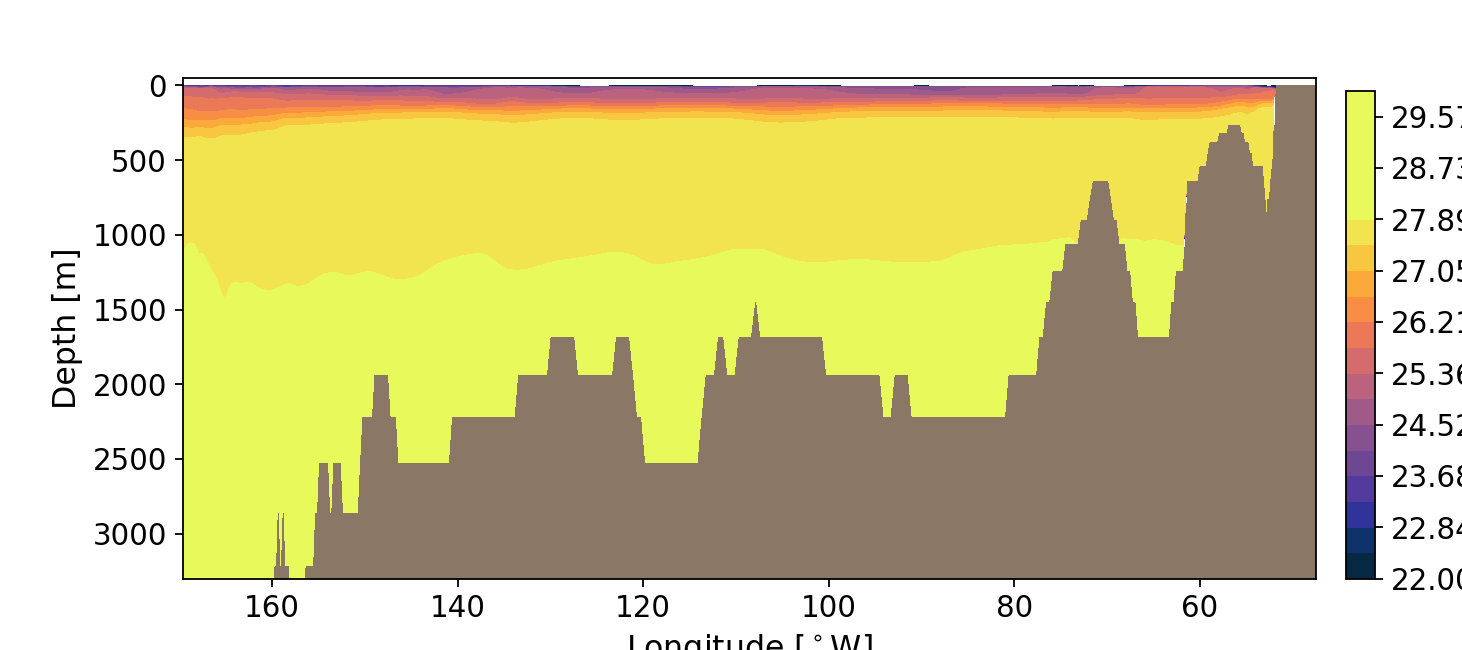

In [25]:
fig, ax = plt.subplots(1,1,figsize=(9,4))
ax.invert_yaxis()
ax.invert_xaxis()
# clevels=[0,22,23,24,25,25.5,26,26.5,27,27.5,28,28.5,30]
clevels=np.linspace(22,30,20)
CS = ax.contourf(-1*xx_AO[0:-2], zz_AO[1:-1], rho[0,0:-2,1600:2050,799],levels=clevels, vmin=22, vmax=28, cmap=cmocean.cm.thermal)
ax.contourf(-1*xx_AO, zz_AO, bathy_AO_masked, cmap=matplotlib.colors.ListedColormap(["#8b7765"]))

ax.set_xlabel('Longitude [$^\circ$W]', fontsize=14)
ax.set_ylabel('Depth [m]', fontsize=14)
ax.set_ylim([3300,-50])
ax.tick_params(axis='both', which='major', labelsize=13)

cbaxes = fig.add_axes([0.92, 0.11, 0.02, 0.75]) 
CBar = plt.colorbar(CS, ax=ax, cax=cbaxes)
CBar.ax.tick_params(labelsize=13) 
CBar.set_label('Density [kg/m3]', fontsize=14)

# Baffin Bay boundary

In [71]:
# station data to include for BB boundary
stations = [12,13,14,15,16,17,18,19,22,23]
stations2 = [9,10,11,20,21,22]

ANHA12lon_BB = mesh_lon[1100,180:799]
NAlon_BB = [NA_lons[i]-360 for i in stations]
NAdep_BB = mdepth

NAdepth_BB  = np.empty((len(stations),288))
NAdepth2_BB = np.empty((len(stations2),288))
NAPb_BB     = np.empty((len(stations),288))
NAPb2_BB    = np.empty((len(stations2),288))
for i in range(0,len(stations)):
    NAdepth_BB[i,:] = masked_depths_NA[stations[i],:]
    NAPb_BB[i,:]    = masked_Pb_NA[stations[i],:]
    
for i in range(0,len(stations2)):
    NAdepth2_BB[i,:] = masked_depths_NA[stations2[i],:]
    NAPb2_BB[i,:]    = masked_Pb_NA[stations2[i],:]
    
NAPb_BB = np.ma.masked_where(np.logical_or( NAPb_BB > 1e5, NAPb_BB < -1e5), NAPb_BB)
NAdepth_BB = np.ma.masked_where(np.logical_or( NAPb_BB > 1e5, NAPb_BB < -1e5), NAdepth_BB)   
NAPb2_BB = np.ma.masked_where(np.logical_or( NAPb2_BB > 1e5, NAPb2_BB < -1e5), NAPb2_BB)
NAdepth2_BB = np.ma.masked_where(np.logical_or( NAPb2_BB > 1e5, NAPb2_BB < -1e5), NAdepth2_BB)

NA_depth_flat = NAdepth_BB.flatten()
NA_depth2_flat = NAdepth2_BB.flatten()

NA_lons_full = np.empty(NAdepth_BB.shape)
NA_lats_full = np.empty(NAdepth2_BB.shape)
for i in range(0,287):
    NA_lons_full[:,i] = NAlon_BB
    NA_lats_full[:,i] = [NA_lats[i] for i in stations2]
    
NA_lons_flat = NA_lons_full.flatten()
NA_lats_flat = NA_lats_full.flatten()

In [72]:
X = np.vstack((NA_lons_flat, NA_depth_flat)).transpose()
X = np.ma.masked_where(np.logical_or( X > 1e5, X < -1e5), X)
X = X.filled(fill_value=0.0)
y_flat = NAPb_BB.flatten()
y_flat = y_flat.filled(fill_value=0.0)

In [73]:
# create a mesh to plot in
xx, zz = np.meshgrid(ANHA12lon_BB, mdepth) #longitude, depth

In 1D:

In [74]:
Pb_prof_BI = np.empty_like(mdepth)
Pb_prof_BI.fill(20)
Pb_prof_BI[mdepth < 20] = 12
Pb_prof_BI[(mdepth < 100) & (mdepth > 20)] = 12
Pb_prof_BI[(mdepth > 300) & (mdepth < 800)] = 25
Pb_prof_BI[mdepth > 2500] = 8

Pb_prof_Gr = np.empty_like(mdepth)
Pb_prof_Gr.fill(20)
Pb_prof_Gr[mdepth < 20] = 12
Pb_prof_Gr[(mdepth < 100) & (mdepth > 20)] = 16
Pb_prof_Gr[(mdepth > 300) & (mdepth < 800)] = 35
Pb_prof_Gr[mdepth > 2500] = 8

In [75]:
smoothed_Pb_prof_BI = savgol_filter(Pb_prof_BI, 15, 3)
smoothed_Pb_prof_Gr = savgol_filter(Pb_prof_Gr, 15, 3)

<IPython.core.display.Javascript object>


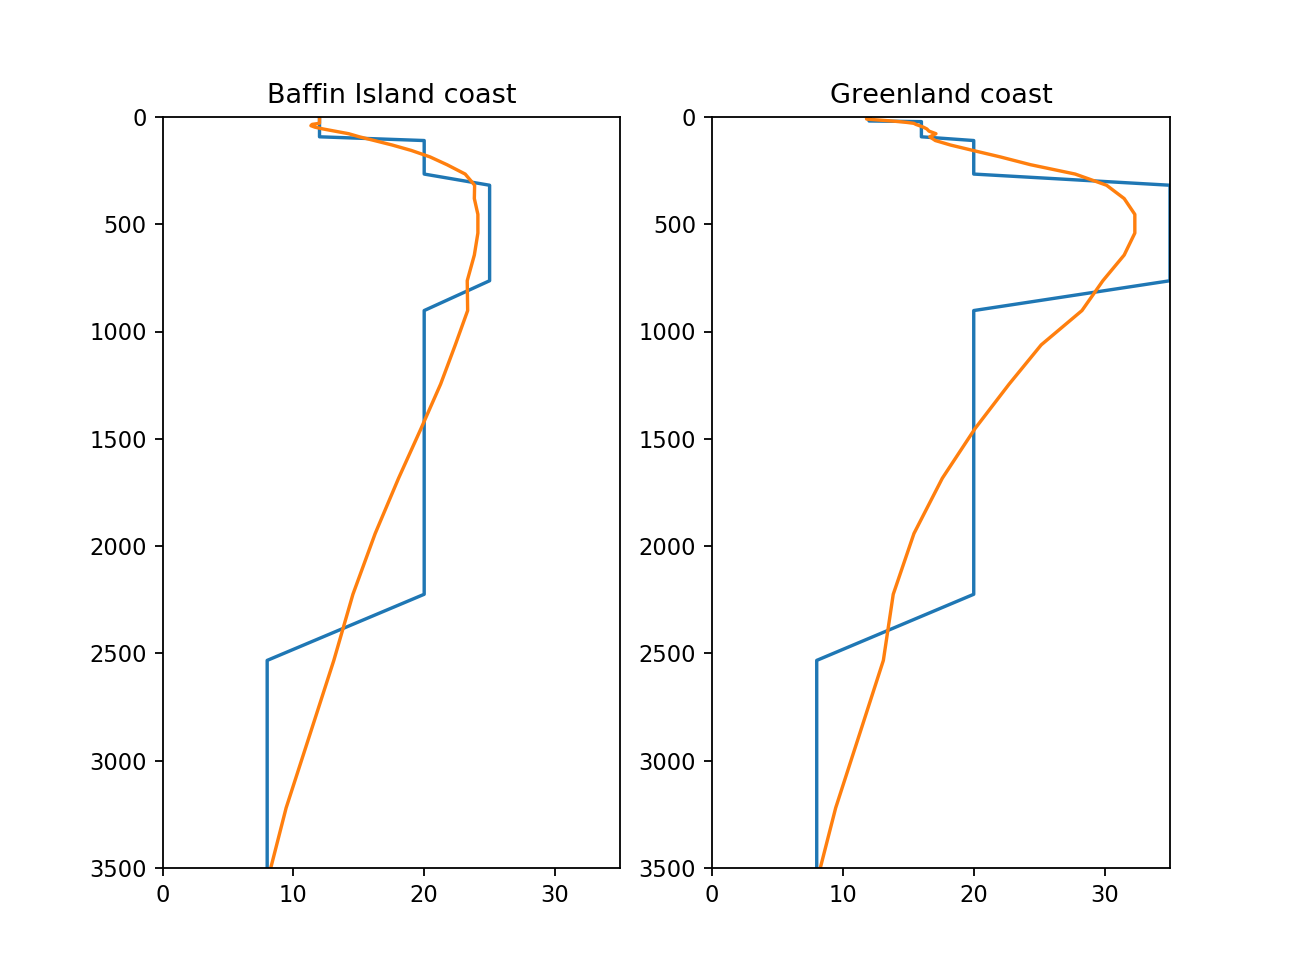

(3500, 0)

In [76]:
fig, ax = plt.subplots(1,2, figsize=(8,6))
ax[0].plot(Pb_prof_BI, mdepth)
ax[0].plot(smoothed_Pb_prof_BI, mdepth)
ax[0].set_title("Baffin Island coast")

ax[1].plot(Pb_prof_Gr, mdepth)
ax[1].plot(smoothed_Pb_prof_Gr, mdepth)
ax[1].set_title("Greenland coast")
\
ax[0].invert_yaxis()
ax[0].set_xlim(0,35)
ax[0].set_ylim(3500,0)
ax[1].invert_yaxis()
ax[1].set_xlim(0,35)
ax[1].set_ylim(3500,0)

In 3D:

In [77]:
bathy_BB = mesh_bathy[:,1100,180:799]
bathy_BB_masked = np.ma.masked_where((bathy_BB > 0.1), bathy_BB)

Pb_BB = np.empty_like(bathy_BB)

# Average background concentration:
Pb_BB.fill(20)

# Low surface concentrations:
Pb_BB[zz < 20] = 12
Pb_BB[(zz < 20) & (xx > -50)] = 16
Pb_BB[(zz < 100) & (zz > 20)] = 18
Pb_BB[(zz < 100) & (zz > 20) & (xx < -50)] = 14 # extended Arctic layer nearby Baffin Island Coast

# High WGIW concentrations:
Pb_BB[(zz > 350) & (zz < 1500)] = 33
Pb_BB[(zz > 350) & (zz < 1500) & (xx < -41)] = 23 # lower concentrations in Baffin Island WGIW
Pb_BB[(zz > 350) & (zz < 1500) & (xx > -36)] = 23 # lower concentrations nearby Greenland coast

# Low bottom concentrations:
Pb_BB[zz > 2500] = 10

In [78]:
smoothed_Pb_BB1 = np.empty_like(Pb_BB)
smoothed_Pb_BB = np.empty_like(Pb_BB)

# Smooth vertically (along depth)
for i in range(0, len(Pb_BB[0,:])):
    smoothed_Pb_BB1[:,i] = savgol_filter(Pb_BB[:,i], 21, 3)

# Smooth horizontally along cross section
for depth in range(0, len(Pb_BB[:,0])):
    smoothed_Pb_BB[depth,:] = savgol_filter(smoothed_Pb_BB1[depth,:], 81, 3)

<IPython.core.display.Javascript object>


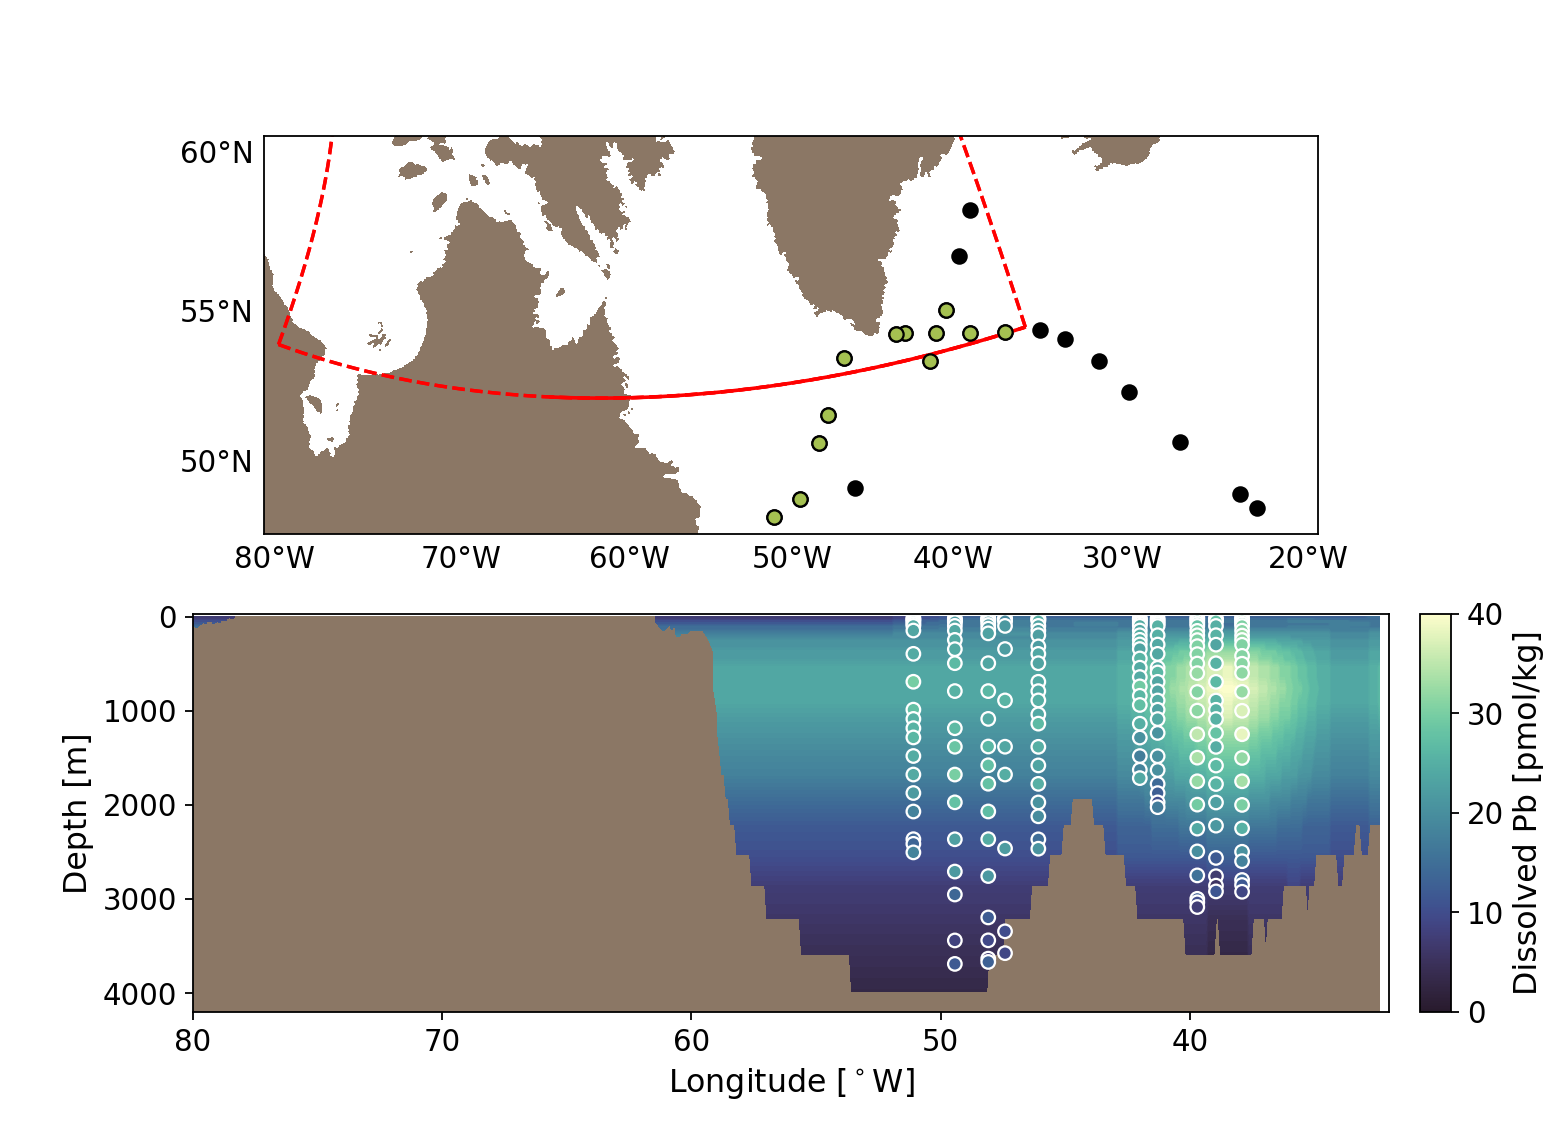

In [82]:
fig, ax = plt.subplots(2,1,figsize=(9.5,7))

#-------------------------------------------------------------------------------------
proj1=Basemap(projection='eqdc',lat_0 = 60, lon_0 = -50, resolution='i', width=4.5e6, height=1.7e6, ax=ax[0])
proj1.drawparallels(np.arange(int(50),int(90),5),labels=[1,0,0,0], linewidth=0.0, fontsize=13)
proj1.drawmeridians(np.arange(int(-140),int(0),10),labels=[0,0,0,1], linewidth=0.0, fontsize=13)

# Domain boundaries:
bathy = mesh_bathy[0,:,:]
bathy_masked = np.ma.masked_where((bathy > 0.1), bathy)
x, y = proj1(mesh_lon, mesh_lat)
proj1.contourf(x, y, bathy_masked, vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=1)

l1=1100
proj1.plot(x[l1:2050,799]   , y[l1:2050,799]   , 'r--', lw=1.5);
proj1.plot(x[l1:2050,799].T , y[l1:2050,799].T , 'r--', lw=1.5);
proj1.plot(x[l1:2050,180]   , y[l1:2050,180]   , 'r--', lw=1.5);
proj1.plot(x[l1:2050,180].T , y[l1:2050,180].T , 'r--', lw=1.5);
proj1.plot(x[l1,180:799]    , y[l1,180:799]    , 'r--', lw=1.5);
proj1.plot(x[l1,180:799].T  , y[l1,180:799].T  , 'r--', lw=1.5);
proj1.plot(x[2050,180:799]    , y[2050,180:799]    , 'r--', lw=1.5);
proj1.plot(x[2050,180:799].T  , y[2050,180:799].T  , 'r--', lw=1.5);
proj1.plot(x[l1,410:799]      , y[l1,410:799]  , 'r-', lw=1.6)

# North Atlantic GEOTRACES station locations:
x_NA, y_NA = proj1(NA_lons-360, NA_lats)
proj1.scatter(x_NA, y_NA, c='k', s=40)
stations = [10,11,12,13,14,15,16,17,18,19,22,23]
for i in stations:
    proj1.scatter(x_NA[i], y_NA[i], c='#a5c151', s=40, edgecolor='k', zorder=5)
    
proj1.scatter(-100000,0, c='#a5c151', s=40, edgecolor='k', label='Stations used')
# ax[0].legend(fontsize=13, loc=3, frameon=False)#fancybox=False)
    
#-------------------------------------------------------------------------------------
ax[1].invert_xaxis()
ax[1].invert_yaxis()
ax[1].contourf(-1*xx, zz, smoothed_Pb_BB, 100, cmap=cmocean.cm.deep_r)
ax[1].contourf(-1*xx, zz, bathy_BB_masked, cmap=matplotlib.colors.ListedColormap(["#8b7765"]))
CS = ax[1].scatter(-1*X[y_flat > 0.0, 0], X[y_flat > 0.0,1], c=y_flat[y_flat > 0.0], vmin=0, vmax=40, \
                edgecolor='w', cmap=cmocean.cm.deep_r)
ax[1].set_xlabel('Longitude [$^\circ$W]', fontsize=14)
ax[1].set_ylabel('Depth [m]', fontsize=14)
ax[1].set_ylim([4200,-30])
ax[1].set_xlim([80, 32])
ax[1].tick_params(axis='both', which='major', labelsize=13)

cbaxes = fig.add_axes([0.92, 0.11, 0.02, 0.35]) 
CBar = plt.colorbar(CS, ax=ax[1], cax=cbaxes)
CBar.ax.tick_params(labelsize=13) 
CBar.set_label('Dissolved Pb [pmol/kg]', fontsize=14)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/Pb_NA_BC.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


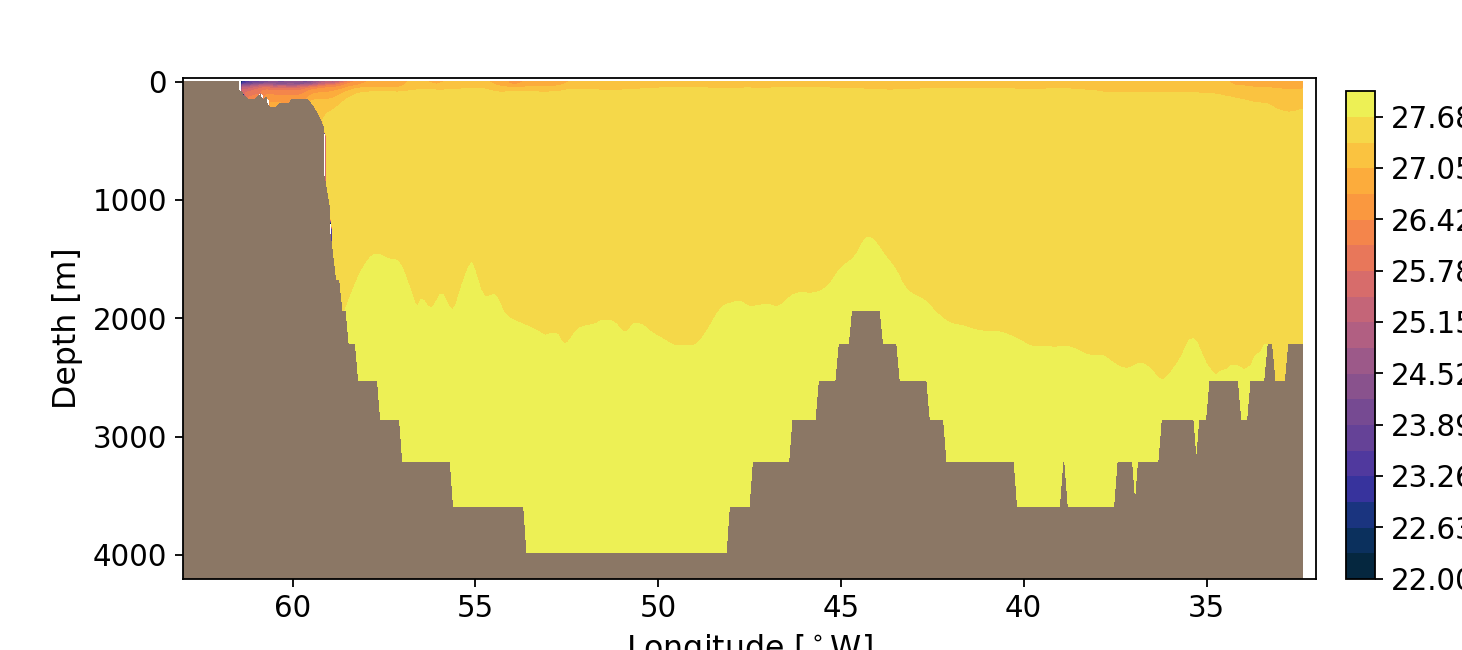

In [35]:
fig, ax = plt.subplots(1,1,figsize=(9,4))
ax.invert_yaxis()
ax.invert_xaxis()
# clevels=[0,22,23,24,25,25.5,26,26.5,27,27.5,28,28.5,30]
clevels=np.linspace(22,28,20)
CS = ax.contourf(-1*xx[0:-2], zz[1:-1], rho[0,0:-2,1100,180:799],levels=clevels, vmin=22, vmax=28, cmap=cmocean.cm.thermal)
ax.contourf(-1*xx, zz, bathy_masked, cmap=matplotlib.colors.ListedColormap(["#8b7765"]))

ax.set_xlabel('Longitude [$^\circ$W]', fontsize=14)
ax.set_ylabel('Depth [m]', fontsize=14)
ax.set_ylim([4200,-30])
ax.set_xlim([63, 32])
ax.tick_params(axis='both', which='major', labelsize=13)

cbaxes = fig.add_axes([0.92, 0.11, 0.02, 0.75]) 
CBar = plt.colorbar(CS, ax=ax, cax=cbaxes)
CBar.ax.tick_params(labelsize=13) 
CBar.set_label('Density [kg/m3]', fontsize=14)

# East Greenland boundary

In [28]:
X2 = np.vstack((NA_lats_flat, NA_depth2_flat)).transpose()
X2 = np.ma.masked_where(np.logical_or( X2 > 1e5, X2 < -1e5), X2)
X2 = X2.filled(fill_value=0.0)
y2_flat = NAPb2_BB.flatten()
y2_flat = y2_flat.filled(fill_value=0.0)

In [29]:
bathy_GR = mesh_bathy[:,1100:1290,799]
bathy_GR_masked = np.ma.masked_where((bathy_GR > 0.1), bathy_GR)

# create a mesh to plot in
ANHA12lat_GR = mesh_lat[1100:1290,799]
yy_GR, zz_GR = np.meshgrid(ANHA12lat_GR, mdepth) #latitude, depth

In [30]:
Pb_GR = np.empty_like(bathy_GR)

Pb_GR.fill(20) # Average background concentration
Pb_GR[zz_GR < 50] = 16 # Low surface concentrations
Pb_GR[(zz_GR > 350) & (zz_GR < 1500) & (yy_GR < 63.5) & (yy_GR > 61.5)]  = 23 # Highest concentrations
Pb_GR[(zz_GR > 350) & (zz_GR < 1500) & (yy_GR < 64) & (yy_GR < 61)]  = 18 

# Low bottom concentrations:
Pb_GR[zz_GR > 2000] = 10

In [31]:
smoothed_Pb_GR1 = np.empty_like(Pb_GR)
smoothed_Pb_GR = np.empty_like(Pb_GR)

# Smooth vertically (along depth)
for i in range(0, len(Pb_GR[0,:])):
    smoothed_Pb_GR1[:,i] = savgol_filter(Pb_GR[:,i], 15, 3)

# Smooth horizontally along cross section
for depth in range(0, len(Pb_GR[:,0])):
    smoothed_Pb_GR[depth,:] = savgol_filter(smoothed_Pb_GR1[depth,:], 31, 3)

<IPython.core.display.Javascript object>


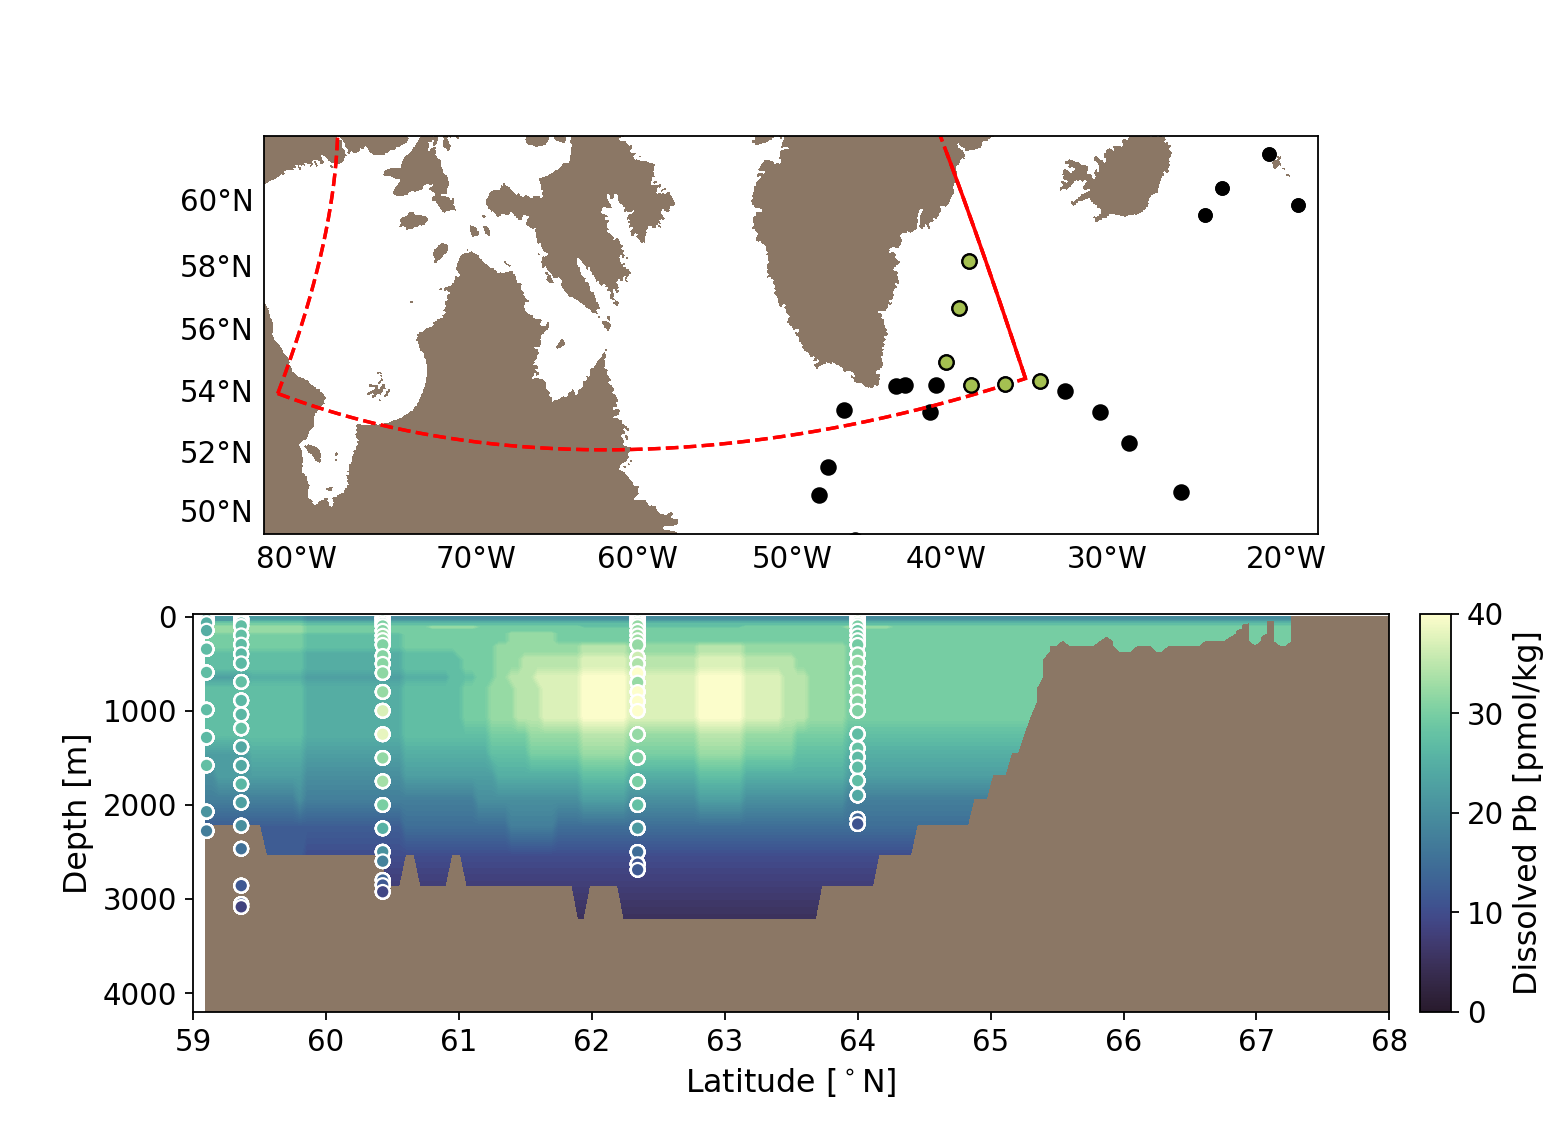

In [82]:
fig, ax = plt.subplots(2,1,figsize=(9.5,7))

#-------------------------------------------------------------------------------------
proj1=Basemap(projection='eqdc',lat_0 = 62, lon_0 = -50, resolution='i', width=4.5e6, height=1.7e6, ax=ax[0])
proj1.drawparallels(np.arange(int(50),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=13)
proj1.drawmeridians(np.arange(int(-140),int(0),10),labels=[0,0,0,1], linewidth=0.0, fontsize=13)

# Domain boundaries:
x, y = proj1(mesh_lon, mesh_lat)
proj1.contourf(x, y, bathy_masked[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=1)

l1=1100
proj1.plot(x[l1:2050,799]   , y[l1:2050,799]   , 'r--', lw=1.5);
proj1.plot(x[l1:2050,799].T , y[l1:2050,799].T , 'r--', lw=1.5);
proj1.plot(x[l1:2050,180]   , y[l1:2050,180]   , 'r--', lw=1.5);
proj1.plot(x[l1:2050,180].T , y[l1:2050,180].T , 'r--', lw=1.5);
proj1.plot(x[l1,180:799]    , y[l1,180:799]    , 'r--', lw=1.5);
proj1.plot(x[l1,180:799].T  , y[l1,180:799].T  , 'r--', lw=1.5);
proj1.plot(x[2050,180:799]    , y[2050,180:799]    , 'r--', lw=1.5);
proj1.plot(x[2050,180:799].T  , y[2050,180:799].T  , 'r--', lw=1.5);
proj1.plot(x[l1:1290,799]      , y[l1:1290,799]  , 'r-', lw=1.6)

# North Atlantic GEOTRACES station locations:
x_NA, y_NA = proj1(NA_lons-360, NA_lats)
proj1.scatter(x_NA, y_NA, c='k', s=40)

for i in stations2:
    proj1.scatter(x_NA[i], y_NA[i], c='#a5c151', s=40, edgecolor='k', zorder=5)
    
proj1.scatter(-100000,0, c='#a5c151', s=40, edgecolor='k', label='Stations used')
    
#-------------------------------------------------------------------------------------

ax[1].invert_yaxis()
ax[1].contourf(yy_GR, zz_GR, smoothed_Pb_GR, 100, cmap=cmocean.cm.deep_r)
ax[1].contourf(yy_GR, zz_GR, bathy_GR_masked, cmap=matplotlib.colors.ListedColormap(["#8b7765"]))
for stn in stations:
#      CS = ax[1].scatter(NA_lats[stn], NA_depths[stn,:], c=Pb_NA[stn,:], vmin=0, vmax=40, \
#                        edgecolor='w', cmap=cmocean.cm.deep_r)
    CS = ax[1].scatter(X2[y2_flat > 0.0, 0], X2[y2_flat > 0.0,1], c=y2_flat[y2_flat > 0.0], vmin=0, vmax=40, \
                    edgecolor='w', cmap=cmocean.cm.deep_r)
ax[1].set_xlabel('Latitude [$^\circ$N]', fontsize=14)
ax[1].set_ylabel('Depth [m]', fontsize=14)
ax[1].set_ylim([4200,-30])
ax[1].set_xlim([59,68])
ax[1].tick_params(axis='both', which='major', labelsize=13)

cbaxes = fig.add_axes([0.92, 0.11, 0.02, 0.35]) 
CBar = plt.colorbar(CS, ax=ax[1], cax=cbaxes)
CBar.ax.tick_params(labelsize=13) 
CBar.set_label('Dissolved Pb [pmol/kg]', fontsize=14)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/Pb_GR_BC.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


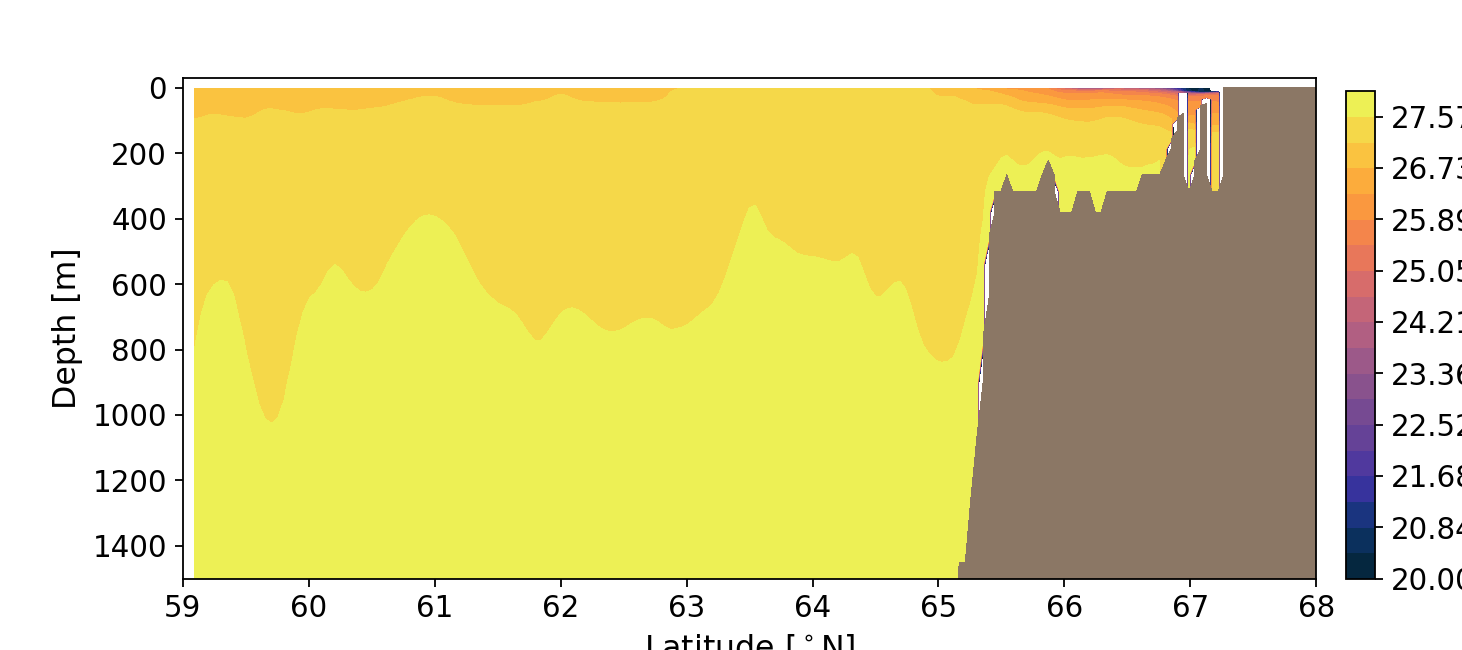

In [40]:
fig, ax = plt.subplots(1,1,figsize=(9,4))
ax.invert_yaxis()
ax.invert_xaxis()
# clevels=[0,22,23,24,25,25.5,26,26.5,27,27.5,28,28.5,30]
clevels=np.linspace(20,28,20)
CS = ax.contourf(yy_GR[0:-2], zz_GR[1:-1], rho[0,0:-2,1100:1290,799],levels=clevels, vmin=20, vmax=28, cmap=cmocean.cm.thermal)
ax.contourf(yy_GR, zz_GR, bathy_GR_masked, cmap=matplotlib.colors.ListedColormap(["#8b7765"]))

ax.set_xlabel('Latitude [$^\circ$N]', fontsize=14)
ax.set_ylabel('Depth [m]', fontsize=14)
ax.set_ylim([1500,-30])
ax.set_xlim([59,68])
ax.tick_params(axis='both', which='major', labelsize=13)

cbaxes = fig.add_axes([0.92, 0.11, 0.02, 0.75]) 
CBar = plt.colorbar(CS, ax=ax, cax=cbaxes)
CBar.ax.tick_params(labelsize=13) 
CBar.set_label('Density [kg/m3]', fontsize=14)

# Smoothe out Pb:

In [32]:
filtered_Pb_GR = sc.ndimage.filters.gaussian_filter(smoothed_Pb_GR, 1.8, order=0, mode='wrap')
filtered_Pb_CB = smoothed_Pb_CB
filtered_Pb_AO = smoothed_Pb_AO
filtered_Pb_BB = sc.ndimage.filters.gaussian_filter(smoothed_Pb_BB, 1.8, order=0, mode='wrap')

# Combined figure of BCs

In [33]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])
cond = (tmask[0,:,:,:] > 0.1) 
land_mask = np.ma.masked_where(cond, tmask[0,:,:,:]) 

<IPython.core.display.Javascript object>


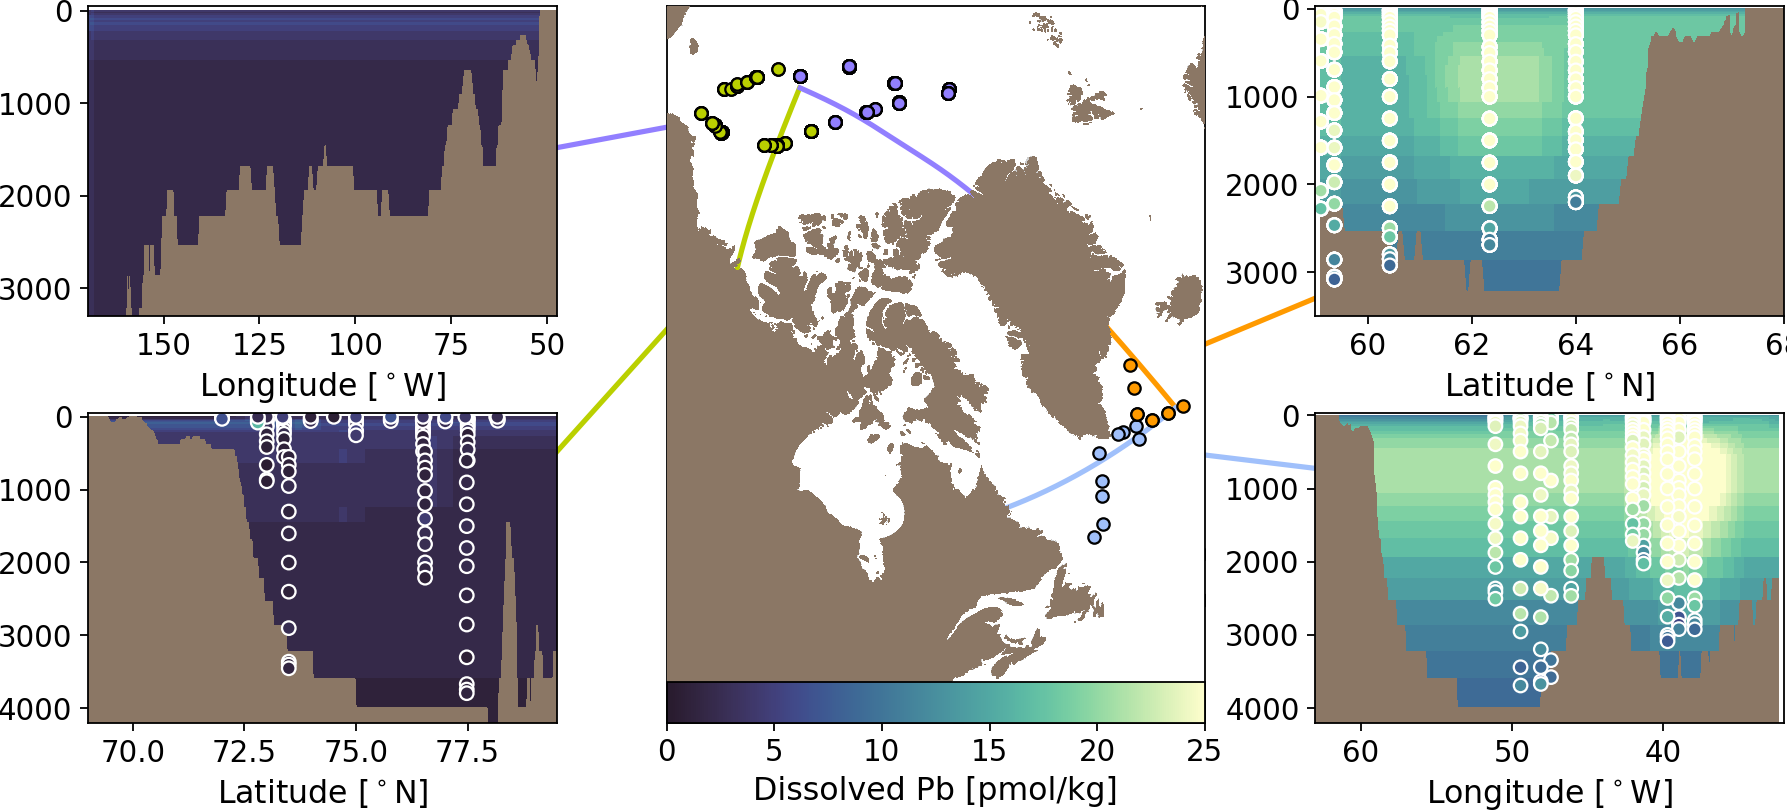

In [35]:
fig = plt.figure(figsize=(11,5))
ax1 = plt.subplot2grid((2, 4), (0, 1), rowspan=2, colspan=2)
ax3 = plt.subplot2grid((2, 4), (0, 0))
ax2 = plt.subplot2grid((2, 4), (1, 0))
ax4 = plt.subplot2grid((2, 4), (0, 3))
ax5 = plt.subplot2grid((2, 4), (1, 3))

clevels=[0,22,23,24,25,25.5,26,26.5,27,27.5,28,28.5,30]

# Map
proj=Basemap(projection='eqdc',lat_0 = 69, lon_0 = -72, resolution='i', width=4.8e6, height=6.4e6, ax=ax1)
x, y = proj(mesh_lon, mesh_lat)
proj.drawlsmask(ocean_color='white', zorder=2)
proj.contourf(x, y, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=4)
p = Polygon([(0, 0),(0, 3.3e6),(1.0e6, 3.3e6),(1.0e6, 0)], \
            facecolor="#8b7765",edgecolor="#8b7765", zorder=4) 
ax1.add_patch(p) 

# Domain boundaries:
l1=1100
proj.plot(x[l1:1290,799]      , y[l1:1290,799]   , '-', c='#ff9a00', lw=2.3, zorder=3)
proj.plot(x[l1,470:799]       , y[l1,470:799]    , '-', c='#a0c0fb', lw=2.3, zorder=3)
proj.plot(x[2050,310:799]     , y[2050,310:799]  , '-', c='#bad000', lw=2.3, zorder=3)
proj.plot(x[1600:2050,799]    , y[1600:2050,799] , '-', c='#927fff', lw=2.3, zorder=3)

# Arctic Ocean station locations:
x_AO, y_AO = proj(AO_lons, AO_lats)
proj.scatter(x_AO, y_AO, c='k', s=30, zorder=5)
proj.scatter(x_AO[230:-1], y_AO[230:-1], c='#bad000', s=30, zorder=5, edgecolor='k')
proj.scatter(x_AO[0:75], y_AO[0:75], c='#bad000', s=30, zorder=5, edgecolor='k')
# Canada Basin station locations:
proj.scatter(x_AO[80:220], y_AO[80:220], c='#927fff', s=30, zorder=5, edgecolor='k')
# North Atlantic GEOTRACES station locations:
x_NA, y_NA = proj(NA_lons-360, NA_lats)
proj.scatter(x_NA, y_NA, c='k', s=30)
stations = [10,11,12,13,14,15,16,17,18,19,22,23]
for i in stations:
    proj.scatter(x_NA[i], y_NA[i], c='#a0c0fb', s=30, edgecolor='k', zorder=5)
for i in stations2: # Greenland coast:
    proj.scatter(x_NA[i], y_NA[i], c='#ff9a00', s=30, edgecolor='k', zorder=5)

#-------------------------------------------------------------------------------------
ax2.invert_yaxis()
ax2.pcolor(yy_CB, zz_CB, filtered_Pb_CB, vmin=0, vmax=25, cmap=cmocean.cm.deep_r)
ax2.contourf(yy_CB, zz_CB, bathy_CB_masked, cmap=matplotlib.colors.ListedColormap(["#8b7765"]))
CS = ax2.scatter(AO_lats[0:75], AO_depths[0:75], c=AO_dPb[0:75], vmin=0, vmax=25, \
                edgecolor='w', cmap=cmocean.cm.deep_r)
CS = ax2.scatter(AO_lats[230:-1], AO_depths[230:-1], c=AO_dPb[230:-1], vmin=0, vmax=25, \
              edgecolor='w', cmap=cmocean.cm.deep_r)
ax2.set_xlabel('Latitude [$^\circ$N]', fontsize=14)
ax2.set_ylim([4200,-50])
ax2.set_xlim([69, 79.5])
ax2.tick_params(axis='both', which='major', labelsize=13)
#-------------------------------------------------------------------------------------
ax3.invert_yaxis()
ax3.invert_xaxis()
ax3.pcolor(-1*xx_AO, zz_AO, filtered_Pb_AO, vmin=0, vmax=25, cmap=cmocean.cm.deep_r)
ax3.contourf(-1*xx_AO, zz_AO, bathy_AO_masked, cmap=matplotlib.colors.ListedColormap(["#8b7765"]))
ax3.set_xlabel('Longitude [$^\circ$W]', fontsize=14)
ax3.set_ylim([3300,-50])
ax3.tick_params(axis='both', which='major', labelsize=13)
#-------------------------------------------------------------------------------------
ax4.invert_yaxis()
ax4.pcolor(yy_GR, zz_GR, filtered_Pb_GR, vmin=0, vmax=25, cmap=cmocean.cm.deep_r)
ax4.contourf(yy_GR, zz_GR, bathy_GR_masked, cmap=matplotlib.colors.ListedColormap(["#8b7765"]))
for stn in stations:
    CS = ax4.scatter(X2[y2_flat > 0.0, 0], X2[y2_flat > 0.0,1], c=y2_flat[y2_flat > 0.0], vmin=0, vmax=25, \
                    edgecolor='w', cmap=cmocean.cm.deep_r)
ax4.set_xlabel('Latitude [$^\circ$N]', fontsize=14)
ax4.set_ylim([3500,-30])
ax4.set_xlim([59,68])
ax4.tick_params(axis='both', which='major', labelsize=13)
#-------------------------------------------------------------------------------------
bathy = mesh_bathy[:,1100,180:799]
bathy_BB_masked = np.ma.masked_where((bathy > 0.1), bathy)
ax5.invert_xaxis()
ax5.invert_yaxis()
CBar = ax5.pcolor(-1*xx, zz, filtered_Pb_BB, vmin=0, vmax=25, cmap=cmocean.cm.deep_r)
ax5.contourf(-1*xx, zz, bathy_BB_masked, cmap=matplotlib.colors.ListedColormap(["#8b7765"]))
CS = ax5.scatter(-1*X[y_flat > 0.0, 0], X[y_flat > 0.0,1], c=y_flat[y_flat > 0.0], vmin=0, vmax=25, \
                edgecolor='w', cmap=cmocean.cm.deep_r)
ax5.set_xlabel('Longitude [$^\circ$W]', fontsize=14)
ax5.set_ylim([4200,-30])
ax5.set_xlim([63, 32])
ax5.tick_params(axis='both', which='major', labelsize=13)
#-------------------------------------------------------------------------------------

color_list= ['#bad000', '#927fff', '#ff9a00', '#a0c0fb' ]
map_coord = [(x[2050, 410], y[2050, 410]), \
             (x[2000, 799], y[2000, 799]), \
             (x[1180, 799], y[1180, 799]), \
             (x[1100, 695], y[1100, 695])]
xs_coord  = [(78, 1500), (50, 1500), (60, 3050), (60,800)]
n=0
# create lines connecting the profiles:
for axes in [ax2,ax3,ax4,ax5]:
    con = ConnectionPatch(xyA=map_coord[n], xyB=xs_coord[n], axesA=ax1, axesB=axes, \
                          coordsA="data", coordsB="data", arrowstyle="-", linewidth=2.3, zorder=1,
                         edgecolor=color_list[n])
    ax1.add_artist(con)
    n+=1

plt.tight_layout(pad=-0.1, w_pad=-10.8, h_pad=-0.1)

cbaxes = fig.add_axes([0.373, 0.11, 0.301, 0.05]) 
CBar = plt.colorbar(CS, ax=ax1, cax=cbaxes, orientation='horizontal')
CBar.ax.tick_params(labelsize=13) 
CBar.set_label('Dissolved Pb [pmol/kg]', fontsize=14)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/Pb_boundaries.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


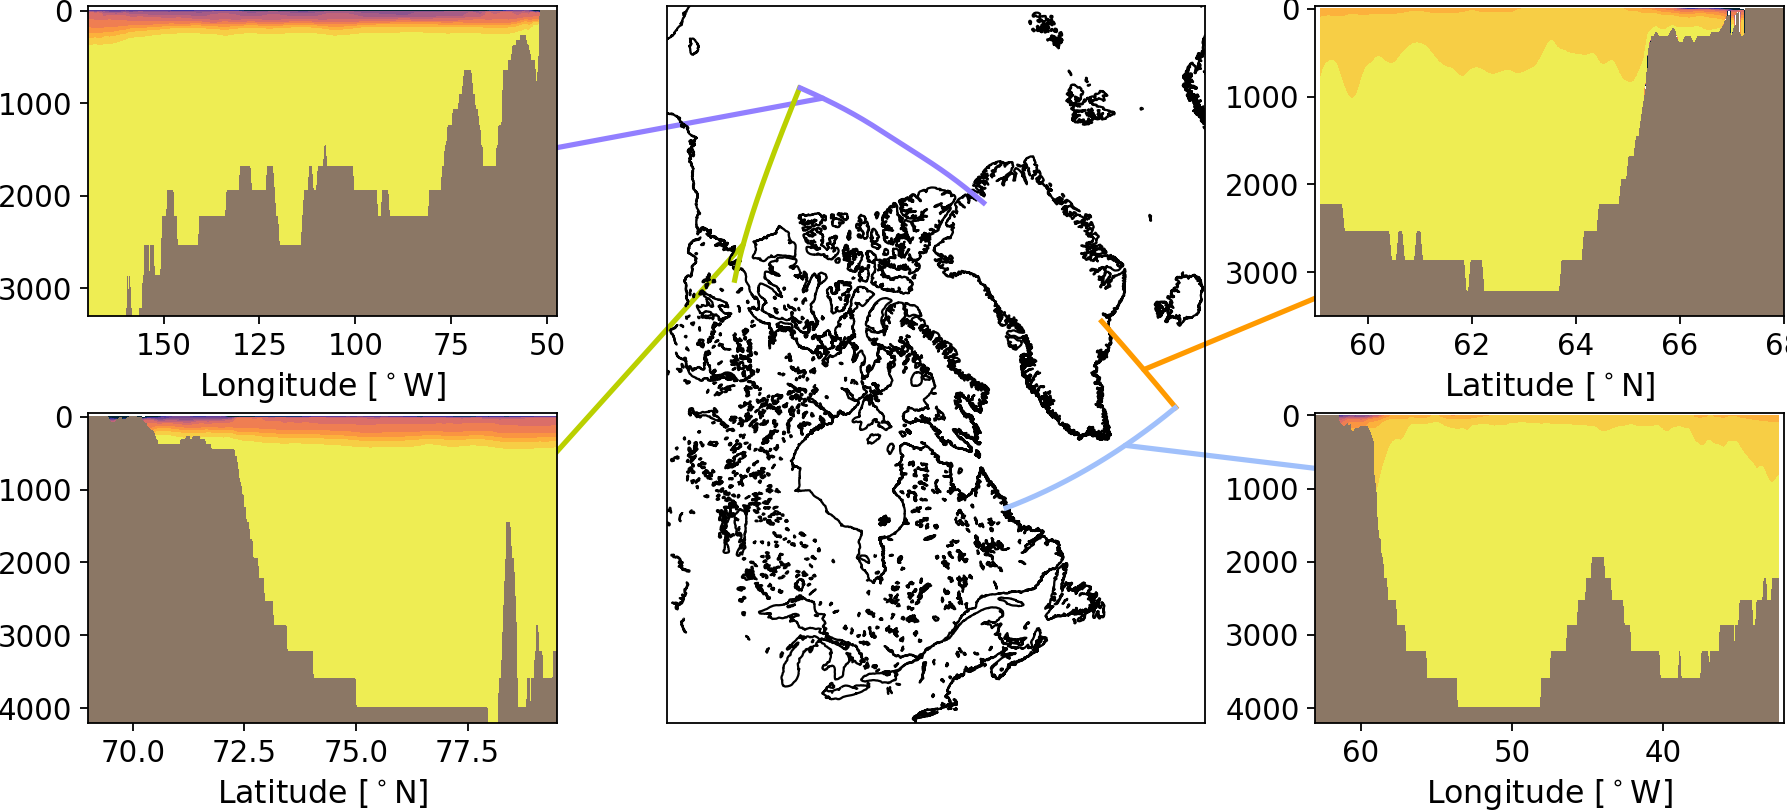

In [41]:
fig = plt.figure(figsize=(11,5))
ax1 = plt.subplot2grid((2, 4), (0, 1), rowspan=2, colspan=2)
ax3 = plt.subplot2grid((2, 4), (0, 0))
ax2 = plt.subplot2grid((2, 4), (1, 0))
ax4 = plt.subplot2grid((2, 4), (0, 3))
ax5 = plt.subplot2grid((2, 4), (1, 3))

# Map
proj=Basemap(projection='eqdc',lat_0 = 69, lon_0 = -72, resolution='i', width=4.8e6, height=6.4e6, ax=ax1)
x, y = proj(mesh_lon, mesh_lat)
proj.drawcoastlines()
#proj.contourf(x, y, bathy_masked[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=3)
#proj.contourf(x, y, ocean_masked[0,:,:], cmap=matplotlib.colors.ListedColormap(["#ffffff"]), zorder=3)
#p = Polygon([(0,3.1e6),(0.925e6, 3.53e6),(980955, 0),(0, 0)], \
#            facecolor="#8b7765",edgecolor="#8b7765") 
#ax1.add_patch(p) 

# Domain boundaries:
l1=1100
proj.plot(x[l1:1290,799]      , y[l1:1290,799]   , '-', c='#ff9a00', lw=2.3, zorder=4)
proj.plot(x[l1,470:799]       , y[l1,470:799]    , '-', c='#a0c0fb', lw=2.3, zorder=4)
proj.plot(x[2050,310:799]     , y[2050,310:799]  , '-', c='#bad000', lw=2.3, zorder=4)
proj.plot(x[1600:2050,799]    , y[1600:2050,799] , '-', c='#927fff', lw=2.3, zorder=4)

# # Arctic Ocean station locations:
# x_AO, y_AO = proj(AO_lons, AO_lats)
# proj.scatter(x_AO, y_AO, c='k', s=30, zorder=5)
# proj.scatter(x_AO[230:-1], y_AO[230:-1], c='#bad000', s=30, zorder=5, edgecolor='k')
# proj.scatter(x_AO[0:75], y_AO[0:75], c='#bad000', s=30, zorder=5, edgecolor='k')
# # Canada Basin station locations:
# proj.scatter(x_AO[80:220], y_AO[80:220], c='#927fff', s=30, zorder=5, edgecolor='k')
# # North Atlantic GEOTRACES station locations:
# x_NA, y_NA = proj(NA_lons-360, NA_lats)
# proj.scatter(x_NA, y_NA, c='k', s=30)
# stations = [10,11,12,13,14,15,16,17,18,19,22,23]
# for i in stations:
#     proj.scatter(x_NA[i], y_NA[i], c='#a0c0fb', s=30, edgecolor='k', zorder=5)
# for i in stations2: # Greenland coast:
#     proj.scatter(x_NA[i], y_NA[i], c='#ff9a00', s=30, edgecolor='k', zorder=5)

#-------------------------------------------------------------------------------------
ax2.invert_yaxis()
ax2.contourf(yy_CB[0:-2], zz_CB[1:-1], rho[0,0:-2,2050,310:799], levels=clevels, vmin=22, vmax=28, cmap=cmocean.cm.thermal)
ax2.contourf(yy_CB, zz_CB, bathy_CB_masked, cmap=matplotlib.colors.ListedColormap(["#8b7765"]))
ax2.set_xlabel('Latitude [$^\circ$N]', fontsize=14)
ax2.set_ylim([4200,-50])
ax2.set_xlim([69, 79.5])
ax2.tick_params(axis='both', which='major', labelsize=13)
#-------------------------------------------------------------------------------------
ax3.invert_yaxis()
ax3.invert_xaxis()
ax3.contourf(-1*xx_AO[0:-2], zz_AO[1:-1], rho[0,0:-2,1600:2050,799], levels=clevels, vmin=22, vmax=28, cmap=cmocean.cm.thermal)
ax3.contourf(-1*xx_AO, zz_AO, bathy_AO_masked, cmap=matplotlib.colors.ListedColormap(["#8b7765"]))
ax3.set_xlabel('Longitude [$^\circ$W]', fontsize=14)
ax3.set_ylim([3300,-50])
ax3.tick_params(axis='both', which='major', labelsize=13)
#-------------------------------------------------------------------------------------
ax4.invert_yaxis()
ax4.contourf(yy_GR[0:-2], zz_GR[1:-1], rho[0,0:-2,1100:1290,799], levels=clevels, vmin=22, vmax=28, cmap=cmocean.cm.thermal)
ax4.contourf(yy_GR, zz_GR, bathy_GR_masked, cmap=matplotlib.colors.ListedColormap(["#8b7765"]))
ax4.set_xlabel('Latitude [$^\circ$N]', fontsize=14)
ax4.set_ylim([3500,-30])
ax4.set_xlim([59,68])
ax4.tick_params(axis='both', which='major', labelsize=13)
#-------------------------------------------------------------------------------------
bathy = mesh_bathy[:,1100,180:799]
bathy_BB_masked = np.ma.masked_where((bathy > 0.1), bathy)
ax5.invert_xaxis()
ax5.invert_yaxis()
ax5.contourf(-1*xx[0:-2], zz[1:-1], rho[0,0:-2,1100,180:799], levels=clevels, vmin=22, vmax=28, cmap=cmocean.cm.thermal)
ax5.contourf(-1*xx, zz, bathy_BB_masked, cmap=matplotlib.colors.ListedColormap(["#8b7765"]))
ax5.set_xlabel('Longitude [$^\circ$W]', fontsize=14)
ax5.set_ylim([4200,-30])
ax5.set_xlim([63, 32])
ax5.tick_params(axis='both', which='major', labelsize=13)
#-------------------------------------------------------------------------------------

color_list= ['#bad000', '#927fff', '#ff9a00', '#a0c0fb' ]
map_coord = [(x[2050, 410], y[2050, 410]), \
             (x[2000, 799], y[2000, 799]), \
             (x[1180, 799], y[1180, 799]), \
             (x[1100, 695], y[1100, 695])]
xs_coord  = [(78, 1500), (50, 1500), (60, 3050), (60,800)]
n=0
# create lines connecting the profiles:
for axes in [ax2,ax3,ax4,ax5]:
    con = ConnectionPatch(xyA=map_coord[n], xyB=xs_coord[n], axesA=ax1, axesB=axes, \
                          coordsA="data", coordsB="data", arrowstyle="-", linewidth=2.3, zorder=1,
                         edgecolor=color_list[n])
    ax1.add_artist(con)
    n+=1

plt.tight_layout(pad=-0.1, w_pad=-10.8, h_pad=-0.1)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/Pb_boundaries.png', bbox_inches='tight')

# Stack boundaries:

In [83]:
bathy_E     = mesh_bathy[:,1100:2050,799]
xx_E, zz_E  = np.meshgrid(mesh_lon[1100:2050,799], mdepth) 

filtered_Pb_E = np.empty_like(bathy_E)
filtered_Pb_E.fill(3) # Average background concentration

filtered_Pb_E[:,1600-1100:2050-1100] = filtered_Pb_AO
filtered_Pb_E[:,1100-1100:1290-1100] = filtered_Pb_GR

In [84]:
rimwidthS = 10
rimwidthE = 20
rimwidthN = 10

In [85]:
dPb_South = np.empty((1,50,1,xx.shape[1]*rimwidthS))
dPb_East  = np.empty((1,50,1,xx_E.shape[1]*rimwidthE))
dPb_North = np.empty((1,50,1,yy_CB.shape[1]*rimwidthN))

In [86]:
dPb_South[0,:,0,:] = np.tile(filtered_Pb_BB, rimwidthS) 
dPb_East[0,:,0,:]  = np.tile(filtered_Pb_E , rimwidthE) 
dPb_North[0,:,0,:] = np.tile(filtered_Pb_CB, rimwidthN) 

In [87]:
print(np.average(dPb_South), np.average(dPb_East), np.average(dPb_North))
print(dPb_South.shape, dPb_East.shape, dPb_North.shape)

14.31718901453958 5.469705263157895 3.212188139059305
(1, 50, 1, 6190) (1, 50, 1, 19000) (1, 50, 1, 4890)


# Write NetCDF BC files:

In [89]:
# Check whether any of the values are zero
print(np.count_nonzero(dPb_South==0), np.count_nonzero(dPb_East==0), np.count_nonzero(dPb_North==0))

0 0 0


In [90]:
# Setup the new NetCDF file:
ncd = nc.Dataset('/ocean/brogalla/GEOTRACES/data/Pb_OBC.nc', 'w', zlib=True)
ncd.createDimension('x1',yy_CB.shape[1]*rimwidthN)
ncd.createDimension('x2',xx.shape[1]*rimwidthS)
ncd.createDimension('x3',xx_E.shape[1]*rimwidthE)
ncd.createDimension('y',1)
ncd.createDimension('deptht',50)
ncd.createDimension('time_counter',None)

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time_counter', size = 0

In [91]:
#Northern BC: Canada Basin
dpb_N = ncd.createVariable('dPb_N', 'float64', ('time_counter','deptht','y','x1'))
dpb_N.units       = 'pmol/kg'
dpb_N.long_name   = 'Dissolved Pb concentration, northern boundary'  
dpb_N.coordinates = 'nav_lon nav_lat deptht time_counter'
dpb_N[:,:,:,:]    = dPb_North

#Southern BC: Baffin Bay / Labrador Sea
dpb_S = ncd.createVariable('dPb_S', 'float64', ('time_counter','deptht','y','x2'))
dpb_S.units       = 'pmol/kg'
dpb_S.long_name   = 'Dissolved Pb concentration, southern boundary'  
dpb_S.coordinates = 'nav_lon nav_lat deptht time_counter'
dpb_S[:,:,:,:]    = dPb_South

#Eastern BC: East Greenland and Arctic Ocean
dpb_E = ncd.createVariable('dPb_E', 'float64', ('time_counter','deptht','y','x3'))
dpb_E.units       = 'pmol/kg'
dpb_E.long_name   = 'Dissolved Pb concentration, eastern boundary'  
dpb_E.coordinates = 'nav_lon nav_lat deptht time_counter'
dpb_E[:,:,:,:]    = dPb_East

In [92]:
ncd.close()